**Theoretical Question**

1. Can we use Bagging for regression problems ?

Yes, Bagging can indeed be used for regression problems. While it's commonly associated with classification (e.g., Random Forests), the underlying principle of combining multiple models to reduce variance is also very effective in regression tasks. For regression, instead of taking a majority vote (as in classification), the predictions of individual models (often decision trees) are averaged to produce the final output.

2.What is the difference between multiple model training and single model training ?


The core difference between multiple model training and single model training lies in their approach to learning and prediction:

**Single Model Training:**
*   Involves training one individual machine learning model (e.g., one decision tree, one neural network) on the entire dataset.
*   The prediction is made solely by this single, optimized model.
*   Often simpler to implement and interpret.
*   Can be prone to overfitting if the model is too complex for the data, or underfitting if it's too simple.
*   Its performance is limited by the capabilities of that single algorithm and its specific training.

**Multiple Model Training (Ensemble Methods):**
*   Involves training several models (often of the same type, but sometimes different) on the data. These models can be trained on different subsets of the data or with different initializations.
*   The final prediction is derived by combining the predictions of these multiple individual models (e.g., averaging their outputs for regression, or majority voting for classification).
*   **Bagging (Bootstrap Aggregating)**, as discussed earlier, is a common multiple model training technique. It trains multiple models independently on different bootstrap samples of the training data and then averages their predictions.
*   **Boosting** (e.g., AdaBoost, Gradient Boosting) is another, where models are trained sequentially, with each new model trying to correct the errors of the previous ones.
*   **Stacking** trains a 'meta-model' to learn how to best combine the predictions of several base models.
*   **Benefits:** Generally leads to higher accuracy, better generalization, and increased robustness to noise and overfitting compared to single models, especially when the individual models are diverse.

3.Explain the concept of feature randomness in Random Forest.

**Feature Randomness (or Feature Subsampling) in Random Forests:**

In a Random Forest, two primary sources of randomness are introduced during the tree-building process to enhance diversity and reduce overfitting:

1.  **Bootstrap Aggregating (Bagging):** This involves training each tree on a different random subset of the *data* (samples) with replacement. This is the 'Bagging' part of Random Forests.
2.  **Feature Randomness:** This is the second crucial layer of randomness, specifically applied when deciding *which features to consider* at each split point within a decision tree.

Here's how it works:

*   **At each split point:** When a decision tree in a Random Forest is being built, instead of considering *all* available features to find the best split, it only considers a random subset of these features. This random subset is typically of a fixed size, commonly `sqrt(number_of_features)` for classification tasks or `number_of_features / 3` for regression tasks, though these are tunable hyperparameters.
*   **Why is it important?**
    *   **Decorrelation of Trees:** If there are one or a few very strong predictor features in the dataset, standard decision trees would tend to choose these features at the top splits of many trees, making the trees highly correlated. This reduces the benefit of ensembling. By introducing feature randomness, even these strong predictors might not be available at every split for every tree. This forces the trees to explore other features and creates more diverse, less correlated trees.
    *   **Reduced Overfitting:** By limiting the features available at each split, the individual trees are intentionally made 'weaker' or less prone to overfitting the training data. When these diverse, weaker trees are combined, they generalize better to unseen data.
    *   **Increased Robustness:** It makes the model more robust to noisy or irrelevant features, as these are less likely to be consistently chosen across all trees.

In essence, feature randomness ensures that each tree in the forest sees a slightly different perspective of the feature space when making its splitting decisions, leading to a more robust and accurate ensemble model.

4.  What is OOB (Out-of-Bag) Score ?

The **Out-of-Bag (OOB) Score** is a method for estimating the generalization error of a Bagging-based ensemble model, such as a Random Forest, *without the need for a separate validation set*.

Here's how it works:

1.  **Bagging Process:** In Bagging (Bootstrap Aggregating), each individual model (e.g., decision tree) in the ensemble is trained on a bootstrap sample of the original training data. A bootstrap sample is created by randomly drawing observations from the original dataset *with replacement*.
2.  **Out-of-Bag Samples:** Because sampling is done with replacement, each bootstrap sample will, on average, contain about 63.2% of the unique original observations, leaving approximately 36.8% of the observations *out of the sample*. These unselected observations for a given tree are called its "out-of-bag" (OOB) samples.
3.  **OOB Error Estimation:** For each observation in the original training set, it will be OOB for some subset of the trees in the ensemble. To calculate the OOB score:
    *   For each observation, predict its value using *only* the trees for which that observation was OOB (i.e., not used in their training).
    *   Aggregate these predictions (e.g., average for regression, majority vote for classification).
    *   Compare this aggregate OOB prediction to the actual value of the observation.
4.  **Final OOB Score:** The OOB score is the average of these errors (or accuracy for classification) across all observations in the training set. It serves as an internal, unbiased estimate of the model's performance on unseen data.

**Why is it useful?**

*   **Efficiency:** It allows for concurrent model training and validation without needing to split the data into explicit training and validation sets, thus utilizing all available data for model training.
*   **Unbiased Estimate:** Because OOB samples are not used to train the trees that predict them, the OOB error provides an almost unbiased estimate of the true generalization error, similar to cross-validation.
*   **Hyperparameter Tuning:** It can be used effectively for hyperparameter tuning in Random Forests, as it quickly provides a reliable estimate of model performance.

5.  How can you measure the importance of features in a Random Forest model ?

Random Forests provide a very convenient and widely used mechanism for measuring the importance of features. There are two primary methods:

1.  **Mean Decrease in Impurity (MDI) / Gini Importance:**
    *   **How it works:** This method calculates the total decrease in node impurity (e.g., Gini impurity for classification, mean squared error for regression) averaged over all trees in the ensemble. When a feature is used to split a node, the impurity of the child nodes is less than the parent node. The larger the decrease, the more important the feature is considered.
    *   **Calculation:** For each feature, the impurity decrease from each split where that feature is used is accumulated across all trees. This sum is then normalized across all features.
    *   **Pros:** It's readily available as an attribute (`feature_importances_`) in most Random Forest implementations (e.g., scikit-learn).
    *   **Cons:** It can be biased towards features that have many unique values or are continuous. It also tends to overestimate the importance of correlated features, as it will randomly pick one of them at a split.

2.  **Permutation Importance (or Mean Decrease in Accuracy):**
    *   **How it works:** This method is often preferred because it's less biased. After a Random Forest model is trained, the permutation importance is calculated by randomly permuting (shuffling) the values of a single feature for the out-of-bag samples (or a separate validation set) and then observing how much the model's performance (e.g., accuracy for classification, R-squared for regression) decreases.
    *   **Calculation:**
        1.  Train the Random Forest and record the baseline performance on a dataset (e.g., OOB samples).
        2.  For each feature:
            *   Randomly shuffle the values of that feature in the dataset.
            *   Measure the model's performance again.
            *   The importance of the feature is the difference between the baseline performance and the performance after shuffling.
    *   **Pros:** It's more reliable and less biased than MDI, especially with correlated features or features with many categories. It directly measures the impact of a feature on the model's predictive power.
    *   **Cons:** It is computationally more expensive than MDI, as it requires re-evaluating the model's performance multiple times.

**Which one to use?**
While MDI is faster and often a good first look, **Permutation Importance** is generally considered more robust and reliable for understanding the true predictive power of features, especially when interpretability is crucial or when dealing with complex datasets.

6.  Explain the working principle of a Bagging Classifier ?

A **Bagging Classifier** (Bootstrap Aggregating Classifier) is an ensemble meta-algorithm primarily designed to improve the stability and accuracy of machine learning algorithms. It works by reducing variance and helping to avoid overfitting.

Here's a breakdown of its working principle:

1.  **Bootstrap Sampling:**
    *   From the original training dataset (which has `N` samples), Bagging creates `k` new subsets of the data. Each subset is generated by randomly sampling `N` observations *with replacement* from the original dataset. This means that some original observations may appear multiple times in a single subset, while others may not appear at all (these are the 'out-of-bag' samples).
    *   These `k` subsets are called **bootstrap samples**.

2.  **Base Classifier Training:**
    *   For each of the `k` bootstrap samples, an independent base classifier is trained. These base classifiers are typically of the same type (e.g., decision trees, but could be any other classifier).
    *   Crucially, each base classifier is trained independently of the others.

3.  **Parallel Training:**
    *   Because each base classifier is trained on an independent bootstrap sample, the training process for all `k` classifiers can be done in parallel.

4.  **Prediction Aggregation (Voting):**
    *   Once all `k` base classifiers are trained, when a new, unseen data point needs to be classified, each of the `k` classifiers makes its own prediction.
    *   For classification tasks, the predictions from all `k` base classifiers are then combined through a **majority voting** scheme. The class that receives the most votes among the `k` classifiers is chosen as the final prediction of the Bagging classifier.

**Key Characteristics and Benefits:**

*   **Variance Reduction:** The primary goal of Bagging is to reduce the variance of the base models. By averaging (or voting) the predictions of many models trained on slightly different data, the impact of noise or specific characteristics of any single training set is smoothed out.
*   **Overfitting Reduction:** By making individual models less sensitive to specific training data points, Bagging helps to mitigate overfitting.
*   **Stability:** The ensemble model becomes more stable and less prone to changes in the training data.
*   **Diversity:** The bootstrap sampling ensures that the base models are diverse, as they are trained on different (though overlapping) subsets of the data. This diversity is crucial for the ensemble to perform better than any single base model.

Random Forests are a well-known extension of Bagging, which add an additional layer of randomness (feature randomness) to the tree-building process.

7.  How do you evaluate a Bagging Classifier’s performance ?

Evaluating the performance of a Bagging Classifier involves using standard classification metrics, along with specific techniques suitable for ensemble methods. Here are the primary ways to evaluate its performance:

1.  **Out-of-Bag (OOB) Score:**
    *   **Principle:** As discussed in Question 4, OOB samples are those data points not included in the bootstrap sample used to train a particular base learner. For each original training instance, predictions can be made by *only* the trees for which that instance was OOB.
    *   **Evaluation:** The OOB score aggregates these predictions and compares them to the true labels, providing an internal, unbiased estimate of the model's generalization performance *without the need for a separate validation set*. This is a highly efficient and reliable metric for Bagging models.

2.  **Standard Classification Metrics on a Test Set:**
    *   **Data Split:** The most common approach is to split your dataset into a training set and an independent test set (e.g., 70/30, 80/20 split).
    *   **Metrics:** After training the Bagging Classifier on the training data, its performance is evaluated on the unseen test data using common classification metrics:
        *   **Accuracy:** The proportion of correctly classified instances.
        *   **Precision:** The proportion of positive identifications that were actually correct.
        *   **Recall (Sensitivity):** The proportion of actual positives that were identified correctly.
        *   **F1-Score:** The harmonic mean of precision and recall, providing a balance between the two.
        *   **ROC AUC (Receiver Operating Characteristic - Area Under the Curve):** Measures the ability of the classifier to distinguish between classes. A higher AUC indicates better performance.
        *   **Confusion Matrix:** A table that describes the performance of a classification model on a set of test data for which the true values are known. It helps visualize true positives, true negatives, false positives, and false negatives.

3.  **Cross-Validation:**
    *   **Method:** K-fold cross-validation can be applied. The dataset is divided into 'k' folds, and the model is trained 'k' times, each time using a different fold as the validation set and the remaining folds as the training set.
    *   **Use:** This provides a more robust estimate of model performance by averaging the metrics across multiple folds, reducing the impact of a particular train-test split. While OOB is often sufficient for Bagging, cross-validation can still be useful for direct comparison with other types of models or for hyperparameter tuning.

4.  **Learning Curves:**
    *   **Purpose:** Plotting learning curves (training score vs. training set size and validation score vs. training set size) can help diagnose whether the model is suffering from high bias (underfitting) or high variance (overfitting), or if adding more data would be beneficial.

5.  **Comparison with Baseline Models:**
    *   It's always good practice to compare the Bagging Classifier's performance against simpler models (e.g., a single decision tree, Logistic Regression) or other ensemble methods to ensure it provides a significant improvement.

In summary, the OOB score provides a convenient and accurate internal estimate, while standard test set evaluation with metrics like accuracy, precision, recall, F1-score, and ROC AUC, possibly bolstered by cross-validation, offers a comprehensive view of a Bagging Classifier's generalization capabilities.

8.  How does a Bagging Regressor work ?

A **Bagging Regressor** operates on the same core principles as a Bagging Classifier, but it is adapted for regression tasks where the goal is to predict a continuous numerical value rather than a categorical class label.

Here's a breakdown of its working principle:

1.  **Bootstrap Sampling:**
    *   Similar to the classifier, the Bagging Regressor starts by creating multiple (e.g., `k`) bootstrap samples from the original training dataset (which has `N` samples). Each bootstrap sample is generated by randomly drawing `N` observations *with replacement* from the original dataset. This ensures diversity among the training sets for each base model.

2.  **Base Regressor Training:**
    *   For each of the `k` bootstrap samples, an independent base regressor is trained. These base regressors are typically of the same type (e.g., decision trees, but can be other regression models).
    *   Each base regressor learns to map input features to a continuous output value based on its specific bootstrap sample.

3.  **Parallel Training:**
    *   Since each base regressor is trained on an independent bootstrap sample, the training process for all `k` regressors can be performed in parallel, which can be computationally efficient.

4.  **Prediction Aggregation (Averaging):**
    *   Once all `k` base regressors are trained, when a new, unseen data point needs a prediction, each of the `k` regressors makes its own individual prediction (a continuous numerical value).
    *   For regression tasks, these individual predictions are then combined by **averaging** them. The simple mean of all the individual predictions from the base regressors becomes the final prediction of the Bagging Regressor.

**Key Characteristics and Benefits (similar to Bagging Classifier, but for regression):**

*   **Variance Reduction:** The primary benefit is a significant reduction in the variance of the overall model. By averaging predictions from multiple models, the impact of noise and the specific quirks of any single training set (which might lead an individual model to overfit) are smoothed out.
*   **Improved Stability and Robustness:** The ensemble model becomes more stable and less sensitive to small variations in the training data or outliers, leading to more robust predictions.
*   **Reduced Overfitting:** Averaging predictions from diverse models helps to mitigate overfitting, especially if the base regressors (like deep decision trees) are prone to overfitting the training data.
*   **Diversity:** The bootstrap sampling ensures that the base regressors are diverse, as they are trained on different (though overlapping) subsets of the data. This diversity is crucial for the ensemble to perform better than any single base regressor.

Random Forests for regression are a prime example of a Bagging Regressor, where the base regressors are decision trees, with an added layer of feature randomness during tree construction.

9.  What is the main advantage of ensemble techniques ?

The main advantage of ensemble techniques lies in their ability to significantly **improve the overall predictive performance, robustness, and generalization capabilities of a model** compared to using a single model.

Here's a breakdown of the key benefits that contribute to this main advantage:

1.  **Reduced Variance (Overfitting Mitigation):** By combining predictions from multiple models, ensemble methods average out the errors and biases of individual models. This effectively reduces the overall variance, making the ensemble less prone to overfitting the training data and thus generalizing better to unseen data.
    *   *Example:* Bagging (like Random Forests) primarily reduces variance by training diverse models on different subsets of data.

2.  **Reduced Bias (Underfitting Mitigation):** Some ensemble techniques can help reduce bias, especially when combining weak learners. By sequentially training models to correct the errors of previous ones, the ensemble can learn more complex patterns that a single weak learner might miss.
    *   *Example:* Boosting (like AdaBoost or Gradient Boosting Machines) primarily focuses on reducing bias.

3.  **Increased Stability and Robustness:** Ensemble models are generally more stable and less sensitive to small changes in the training data, outliers, or noise. If one base model makes a mistake, others can compensate, leading to more reliable predictions.

4.  **Higher Accuracy:** As a result of reduced variance and/or bias, ensemble methods frequently achieve higher accuracy than their individual base models.

5.  **Handling Complex Relationships:** Ensembles can capture complex, non-linear relationships in data more effectively by combining various perspectives from different models.

In essence, ensemble techniques leverage the

10.  What is the main challenge of ensemble methods ?

While ensemble methods offer significant advantages in terms of performance and robustness, they also come with certain challenges:

1.  **Increased Computational Cost:** Training multiple models and combining their predictions is inherently more computationally expensive and time-consuming than training a single model. This can be a significant drawback for very large datasets or real-time applications where prediction latency is critical.

2.  **Increased Complexity and Reduced Interpretability:** As you combine more models, the overall ensemble becomes more complex, making it harder to understand *why* a particular prediction was made. This 'black box' nature can be a disadvantage in fields where model interpretability and explainability are crucial (e.g., healthcare, finance).

3.  **Storage Requirements:** Storing multiple trained models can require significantly more memory and disk space compared to a single model.

4.  **Careful Hyperparameter Tuning:** Ensemble methods often have their own set of hyperparameters (e.g., number of estimators, learning rate in boosting) in addition to the hyperparameters of the base learners. Tuning these effectively can be a complex and time-consuming process.

5.  **Risk of Overfitting (especially with Boosting):** While ensemble methods generally reduce overfitting, certain techniques like Boosting can still overfit if not carefully tuned. If too many weak learners are added, or if the learning rate is too high, the model can start to memorize the training data, leading to poor generalization.

6.  **Diminishing Returns:** Beyond a certain point, adding more base learners to an ensemble may yield only marginal improvements in performance, while significantly increasing computational and storage costs.

In summary, the primary challenges revolve around the **increased computational resources, complexity, and reduced interpretability** that come with managing and deploying multiple models instead of a single one.

11. Explain the key idea behind ensemble techniques.

Ensemble techniques in machine learning are based on the idea that combining multiple models can produce better results than relying on a single model. Instead of depending on one predictor, ensembles aggregate the outputs of several models to reduce errors, improve accuracy, and enhance generalization. This works because different models may capture different patterns in the data, and when their predictions are combined—through methods like bagging, boosting, or stacking—the overall system becomes more robust and less prone to overfitting or bias. In essence, ensemble learning leverages the “wisdom of the crowd,” where the collective decision of diverse models is more reliable and powerful than any individual model alone

12.What is a Random Forest Classifier ?

A **Random Forest Classifier** is an ensemble machine learning algorithm specifically designed for classification tasks. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

It is an extension of the Bagging (Bootstrap Aggregating) ensemble method, incorporating two key sources of randomness to enhance its performance and prevent overfitting:

1.  **Bootstrap Aggregating (Bagging):** Each individual decision tree in the Random Forest is trained on a different random subset of the training data, sampled *with replacement*. This means that some data points may be used multiple times in a single tree's training, while others may not be used at all.

2.  **Feature Randomness (Feature Subsampling):** When each decision tree is being constructed, at every split point, it doesn't consider all available features to find the best split. Instead, it considers only a random subset of the features. This forces diversity among the trees and prevents strong predictor features from dominating all trees, leading to more decorrelated trees.

**How it works for classification:**

1.  **Build Multiple Trees:** A large number of decision trees are built. Each tree is trained on a different bootstrap sample of the training data and, at each split, considers only a random subset of features.
2.  **Individual Predictions:** When a new data point needs to be classified, each decision tree in the forest makes its own prediction (i.e., outputs a class label).
3.  **Majority Voting:** The final classification output of the Random Forest is determined by taking a **majority vote** among the predictions of all the individual trees. The class that receives the most votes is chosen as the final prediction.

**Key Characteristics and Benefits:**

*   **High Accuracy:** Often achieves very high accuracy compared to single decision trees or other classification algorithms.
*   **Reduces Overfitting:** The combination of bagging and feature randomness effectively reduces the variance of the model, making it less prone to overfitting the training data.
*   **Handles High-Dimensional Data:** Can effectively work with datasets containing a large number of features.
*   **Implicit Feature Importance:** Provides a way to estimate the importance of features (e.g., using Mean Decrease in Impurity or Permutation Importance).
*   **Robustness to Noise and Outliers:** The ensemble nature makes it more robust to noisy data and outliers.

13. What are the main types of ensemble techniques ?


Ensemble techniques combine multiple machine learning models to achieve better predictive performance than could be obtained from any of the constituent models alone. The main types of ensemble techniques are:

1.  **Bagging (Bootstrap Aggregating):**
    *   **Key Idea:** Training multiple instances of the same base learning algorithm on different random subsets (bootstrap samples) of the training data, and then aggregating their predictions.
    *   **How it works:** Each model is trained independently on a bootstrap sample (sampling with replacement) of the original data. For classification, predictions are combined by majority vote; for regression, they are averaged.
    *   **Primary Benefit:** Reduces variance and helps to prevent overfitting.
    *   **Examples:** Random Forest (which adds feature randomness to Bagging of decision trees), Bagging Classifier/Regressor.

2.  **Boosting:**
    *   **Key Idea:** Sequentially training models, where each new model is designed to correct the errors of the previous ones. It focuses on misclassified or high-error instances from prior models.
    *   **How it works:** Models are added one by one, and each new model learns from the mistakes of the preceding models. Weights are often assigned to data points, with misclassified points receiving higher weights for subsequent models.
    *   **Primary Benefit:** Reduces bias and converts weak learners into strong learners.
    *   **Examples:** AdaBoost, Gradient Boosting Machines (GBM), XGBoost, LightGBM, CatBoost.


14.  What is ensemble learning in machine learning ?

Ensemble learning in machine learning is a powerful technique that combines the predictions from multiple machine learning models (often called "base learners" or "weak learners") to achieve a more robust, accurate, and generalized predictive model than any single base model could achieve on its own.

The core idea behind ensemble learning is rooted in the concept of "wisdom of the crowd," where the collective decision of diverse individuals tends to be more accurate and reliable than the decision of any single expert.

**Key Principles and Benefits:**

*   **Improved Accuracy:** By combining multiple models, ensemble methods can reduce both bias and variance, leading to higher predictive accuracy. Different models might capture different aspects of the data, and by aggregating their insights, a more comprehensive understanding is formed.
*   **Robustness:** Ensembles are generally more robust to noise, outliers, and small fluctuations in the training data. If one base model makes an error or is sensitive to a particular data point, other models in the ensemble can compensate, leading to more stable predictions.
*   **Better Generalization:** Ensemble models are less prone to overfitting than individual complex models. By averaging or voting across diverse models, the ensemble tends to generalize better to unseen data.
*   **Diversity is Key:** For an ensemble to be effective, its base models should ideally be diverse. This diversity can come from:
    *   **Different Training Data Subsets:** (e.g., Bagging, where models are trained on bootstrap samples).
    *   **Different Learning Algorithms:** (e.g., Stacking, where various types of models are combined).
    *   **Different Feature Subsets:** (e.g., Random Forests, which use feature randomness).
    *   **Sequential Learning on Errors:** (e.g., Boosting, where subsequent models focus on correcting errors of previous ones).

**Common Ensemble Techniques:**

*   **Bagging (Bootstrap Aggregating):** Builds multiple models independently on different bootstrap samples of the training data and then averages (regression) or votes (classification) their predictions (e.g., Random Forest).
*   **Boosting:** Builds models sequentially, where each new model tries to correct the errors made by the previous models, focusing more on misclassified instances (e.g., AdaBoost, Gradient Boosting Machines, XGBoost).
*   **Stacking (Stacked Generalization):** Trains multiple base models and then trains a meta-model (or 'blender') to learn how to best combine the predictions of these base models.

In essence, ensemble learning leverages the collective intelligence of multiple models to produce a superior predictive performance, making it a cornerstone technique in modern machine learning.

15.  When should we avoid using ensemble methods?

While ensemble methods are powerful, there are situations where you might want to avoid or reconsider using them:

1.  **When Interpretability is Paramount:** Ensemble methods, especially complex ones like Random Forests or Gradient Boosting, are often considered 'black box' models. If understanding *why* a specific prediction was made (e.g., in medical diagnosis, legal decisions, or financial risk assessment) is more critical than predictive accuracy, a simpler, more interpretable model (like a single decision tree, linear regression, or logistic regression) might be preferred.

2.  **When Computational Resources are Highly Constrained:** Training and deploying multiple models requires significantly more computational power (CPU/GPU, memory) and time compared to a single model. If you have limited resources or strict latency requirements for predictions, the overhead of ensembles might be prohibitive.

3.  **When Training Data is Very Small:** Ensemble methods often benefit from a large and diverse training dataset to create diverse base models. With very small datasets, the bootstrapping in bagging might not generate sufficiently different subsets, or boosting might quickly overfit.

4.  **When the Base Model is Already Performing Very Well and is Simple:** If a single, simple model (e.g., logistic regression) already achieves satisfactory performance and you value simplicity, interpretability, or speed, the marginal gain from an ensemble might not justify the increased complexity.

5.  **When the Problem is Trivial or Easily Solvable:** For very simple problems where a basic algorithm provides excellent results, introducing an ensemble might be overkill, adding unnecessary complexity without proportional benefits.

6.  **When Base Models are Highly Correlated:** If the base models in your ensemble are not diverse and make very similar errors, combining them will not lead to significant improvements. Diversity among base models is key to the success of ensemble methods.

In essence, the decision to avoid ensemble methods often comes down to a trade-off between predictive performance and factors like interpretability, computational cost, and data availability.

16. How does Bagging help in reducing overfitting ?

Bagging (Bootstrap Aggregating) is a powerful ensemble technique that primarily helps in reducing overfitting by addressing the **variance** component of a model's error. Here's a breakdown of how it works:

1.  **Creates Diverse Base Models:**
    *   Bagging trains multiple base models (e.g., decision trees) on different **bootstrap samples** of the original training data. A bootstrap sample is created by sampling the original data *with replacement*. This means each base model sees a slightly different subset of the training data.
    *   Because each model is trained on a different data subset, they learn different patterns and make different errors, leading to a diverse set of models.

2.  **Reduces Variance by Averaging/Voting:**
    *   Individual, complex models (like deep decision trees) are often prone to overfitting because they can learn the noise and specific quirks of their training data, leading to high variance. They perform very well on the training data but poorly on unseen data.
    *   Bagging combines the predictions of these multiple diverse base models: by **averaging** their predictions for regression tasks, or by taking a **majority vote** for classification tasks.
    *   The act of averaging or voting effectively *smooths out* the individual idiosyncrasies and errors of the base models. The errors made by one model might be cancelled out by correct predictions or different errors made by other models. This reduces the overall variance of the ensemble model.

3.  **Stabilizes Predictions:**
    *   An overfit model is very sensitive to small changes in the training data. Bagging makes the overall model more stable because it's not relying on a single model trained on one specific dataset. Instead, it aggregates insights from multiple models trained on various data perspectives.

In essence, Bagging works on the principle that while individual models might overfit their specific training subsets, the collective decision, when aggregated, will be more robust and generalize better to unseen data, thus mitigating the problem of overfitting.

17.  Why is Random Forest better than a single Decision Tree ?

A **Random Forest** is generally better than a single **Decision Tree** due to several key advantages stemming from its ensemble nature:

1.  **Reduces Overfitting (Primary Advantage):**
    *   **Single Decision Tree:** A single, unconstrained decision tree can easily overfit the training data by growing too deep and learning noise or specific idiosyncrasies in the data. This leads to high variance and poor generalization to unseen data.
    *   **Random Forest:** By combining multiple decision trees (typically hundreds or thousands), each trained on a different bootstrap sample of the data and considering only a random subset of features at each split, the Random Forest significantly reduces variance and overfitting. The errors of individual trees tend to cancel each other out when their predictions are aggregated.

2.  **Higher Accuracy:**
    *   **Single Decision Tree:** Can be less accurate, especially if the data is complex or noisy, as it's prone to local optima in its greedy splitting approach.
    *   **Random Forest:** The aggregation of many diverse trees often leads to much higher predictive accuracy. It leverages the 'wisdom of the crowd' principle, where the collective decision is more robust and accurate than any individual tree's decision.

3.  **Handles High-Dimensional Data:**
    *   **Single Decision Tree:** Can struggle with very high-dimensional data, as the greedy splitting might not find the optimal features efficiently.
    *   **Random Forest:** The feature randomness (subsampling features at each split) helps manage high-dimensional data by forcing trees to explore different feature combinations, making it more robust to irrelevant features.

4.  **Robustness to Noise and Outliers:**
    *   **Single Decision Tree:** Can be very sensitive to noise and outliers, which can lead to skewed splits and poor generalization.
    *   **Random Forest:** The ensemble approach makes it more robust. Outliers or noisy data points might affect a few trees, but their impact is diluted across the entire forest.

5.  **Implicit Feature Importance:**
    *   **Single Decision Tree:** Provides some measure of feature importance based on how much a feature reduces impurity.
    *   **Random Forest:** Offers a more reliable and robust measure of feature importance (e.g., Mean Decrease in Impurity, Permutation Importance) by aggregating insights across many trees, helping to identify the most impactful features for the overall model.

6.  **Better Generalization:** Because of reduced overfitting and higher accuracy, Random Forests generally generalize much better to new, unseen data compared to a single decision tree.

In summary, while a single decision tree is interpretable and fast, a Random Forest trades some of that simplicity for significant improvements in predictive performance, robustness, and generalization by employing multiple, diverse trees.

18.  What is the role of bootstrap sampling in Bagging ?

**The Role of Bootstrap Sampling in Bagging (Bootstrap Aggregating):**

Bootstrap sampling is the foundational mechanism that gives Bagging its name and is critical for its effectiveness in improving model performance, particularly in reducing variance and mitigating overfitting.

Here's its role explained:

1.  **Creating Diverse Training Subsets:**
    *   **Process:** From the original training dataset (which has `N` samples), bootstrap sampling involves repeatedly drawing `N` samples *with replacement*. This means that in each bootstrap sample:
        *   Some original observations will appear multiple times.
        *   Some original observations will not appear at all (these are the 'out-of-bag' samples, approximately 36.8% of the original data).
    *   **Outcome:** This process generates multiple (e.g., `k`) distinct, yet overlapping, training subsets. Each of these subsets is slightly different from the original dataset and from each other.

2.  **Inducing Model Diversity (Decorrelation):**
    *   When an independent base model (e.g., a decision tree) is trained on each of these `k` bootstrap samples, they learn slightly different patterns and make different errors. This diversity is crucial.
    *   If all base models were trained on the exact same data, they would likely make similar errors, and aggregating their predictions wouldn't offer much benefit. Bootstrap sampling ensures that each model gets a unique perspective of the data, leading to models that are decorrelated to some extent.

3.  **Reducing Variance:**
    *   Individual, complex models (like unpruned decision trees) tend to have high variance, meaning they are very sensitive to the specific training data they see. They might overfit to the noise in their particular training sample.
    *   By training multiple such high-variance models on different bootstrap samples, and then averaging or voting their predictions, Bagging effectively *reduces the overall variance* of the ensemble. The errors and idiosyncratic biases of individual models tend to cancel each other out in the aggregation process, leading to a more stable and robust final prediction.

4.  **Mitigating Overfitting:**
    *   Because the ensemble's prediction is an average or majority vote of diverse, high-variance models, it doesn't get overly fixated on the noise or specific patterns of any single training dataset. This makes the Bagging ensemble less prone to overfitting the training data and better at generalizing to unseen data.

5.  **Enabling Out-of-Bag (OOB) Evaluation:**
    *   As a side benefit, the out-of-bag samples (those not used to train a particular tree) can be used as an internal, unbiased validation set. This allows for performance estimation without needing a separate cross-validation split, making the evaluation process more efficient.

In essence, bootstrap sampling is the engine of Bagging, creating the necessary diversity among base learners that allows the ensemble to effectively reduce variance and produce a more generalized and accurate predictive model.

19. What are some real-world applications of ensemble techniques ?

Ensemble techniques are widely used across various industries due to their ability to achieve higher accuracy, robustness, and better generalization compared to single models. Here are some real-world applications:

1.  **Finance and Banking:**
    *   **Fraud Detection:** Identifying fraudulent transactions in credit card usage, loan applications, or insurance claims. Ensemble methods can combine different models to detect subtle patterns indicative of fraud.
    *   **Credit Scoring:** Predicting the creditworthiness of individuals or companies to approve loans or set interest rates. Ensembles help in making more accurate risk assessments.
    *   **Algorithmic Trading:** Forecasting stock prices, market trends, or currency exchange rates to inform trading strategies.

2.  **Healthcare and Medicine:**
    *   **Disease Diagnosis:** Assisting doctors in diagnosing diseases like cancer, diabetes, or heart conditions by analyzing medical images, patient records, and lab results. Ensembles can improve the accuracy of diagnostic predictions.
    *   **Drug Discovery:** Predicting the efficacy and potential side effects of new drug compounds.
    *   **Patient Outcome Prediction:** Forecasting patient recovery rates, readmission risks, or the likelihood of adverse events.

3.  **E-commerce and Retail:**
    *   **Recommendation Systems:** Suggesting products to customers based on their past behavior and preferences (e.g., "Customers who bought this also bought..."). Ensembles combine various user and item features for more personalized recommendations.
    *   **Demand Forecasting:** Predicting future sales for inventory management and supply chain optimization.
    *   **Customer Churn Prediction:** Identifying customers who are likely to stop using a service or buying products, allowing businesses to implement retention strategies.

4.  **Image and Speech Recognition:**
    *   **Object Detection:** Identifying and localizing objects within images or video streams (e.g., self-driving cars, security surveillance).
    *   **Facial Recognition:** Used in security, authentication, and surveillance.
    *   **Speech Recognition:** Converting spoken language into text (e.g., virtual assistants, transcription services).

5.  **Marketing and Advertising:**
    *   **Targeted Advertising:** Identifying specific customer segments most likely to respond to certain advertisements.
    *   **Sentiment Analysis:** Analyzing customer reviews, social media posts, and feedback to understand public opinion about products or brands.
    *   **Campaign Optimization:** Predicting the best channels and content for marketing campaigns to maximize ROI.

6.  **Weather Forecasting and Environmental Monitoring:**
    *   **Predicting Weather Patterns:** Combining various meteorological models to improve the accuracy of short-term and long-term weather forecasts.
    *   **Pollution Prediction:** Forecasting air quality or pollution levels based on environmental factors.

7.  **Cybersecurity:**
    *   **Intrusion Detection:** Identifying malicious activities or anomalies in network traffic that indicate cyber-attacks.
    *   **Spam Detection:** Classifying emails as legitimate or spam.

These examples highlight the versatility and effectiveness of ensemble techniques in solving complex predictive problems across diverse domains, where high accuracy and reliability are crucial.

20. What is the difference between Bagging and Boosting ?

Both Bagging (Bootstrap Aggregating) and Boosting are powerful ensemble techniques designed to improve the performance of machine learning models. However, they differ significantly in their approach, goals, and how they build and combine base learners.

Here's a breakdown of their key differences:

**Bagging (e.g., Random Forest)**

1.  **Training Process:**
    *   **Parallel:** Base learners are trained **independently and in parallel** on different subsets of the data.
    *   **Data Sampling:** Each base learner is trained on a **bootstrap sample** (sampling with replacement) of the original training data. This means each base learner sees a slightly different, random subset of the data.

2.  **Focus/Goal:**
    *   **Reduces Variance:** Primarily aims to reduce the **variance** of high-variance, low-bias base models (like deep decision trees). It makes the model less sensitive to the specific training data.
    *   **Mitigates Overfitting:** By averaging or voting predictions from diverse, often overfit, individual models, it smooths out their errors, leading to better generalization.

3.  **Base Learners:**
    *   Typically uses **strong learners** (e.g., deep, unpruned decision trees) that are prone to overfitting. The ensemble helps to temper this overfitting.
    *   The base learners are often of the same type.

4.  **Weighting:**
    *   All base learners are typically given **equal weight** in the final prediction.
    *   Data points in the training set are also typically given equal weight, though their presence in bootstrap samples varies.

5.  **Prediction Aggregation:**
    *   **Averaging** for regression tasks.
    *   **Majority Voting** for classification tasks.

6.  **Error Correction:**
    *   Does not explicitly focus on correcting errors of previous models. Diversity is achieved through data sampling.

7.  **Example:**
    *   **Random Forest** is a prime example, which combines Bagging with an additional layer of feature randomness.

**Boosting (e.g., AdaBoost, Gradient Boosting, XGBoost)**

1.  **Training Process:**
    *   **Sequential:** Base learners are trained **sequentially**, with each new model attempting to correct the errors made by the previous models.
    *   **Data Sampling/Weighting:** Subsequent models focus more on the data points that were **misclassified or had high errors** by the preceding models. This can involve re-weighting misclassified samples or fitting new models to the residuals (errors).

2.  **Focus/Goal:**
    *   **Reduces Bias:** Primarily aims to reduce the **bias** of weak learners. It tries to convert a collection of weak learners into a strong learner.
    *   **Improves Accuracy:** By iteratively improving upon errors, it can achieve very high accuracy.

3.  **Base Learners:**
    *   Typically uses **weak learners** (e.g., shallow decision trees, often called 'stumps' for AdaBoost) that individually perform slightly better than random guessing.
    *   The base learners are often of the same type.

4.  **Weighting:**
    *   Base learners are often assigned **different weights** in the final prediction, with better-performing models (or those added later in the sequence) contributing more.
    *   Data points are also re-weighted, with misclassified points getting higher weights for subsequent learners.

5.  **Prediction Aggregation:**
    *   Typically a **weighted sum** for both regression and classification, where each base model's contribution is scaled by its performance.

6.  **Error Correction:**
    *   **Explicitly corrects errors** by giving more attention to previously misclassified or poorly predicted samples.

7.  **Example:**
    *   **AdaBoost** (Adaptive Boosting), **Gradient Boosting Machines (GBM)**, **XGBoost**, **LightGBM**, **CatBoost**.

In summary, Bagging builds diverse models independently to reduce variance, while Boosting builds models sequentially, with each new model correcting the errors of its predecessors, primarily to reduce bias. Bagging thrives on diversity and parallelism, whereas Boosting relies on a corrective, iterative process.

**Practical Question**

21.  Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

### 1. Generate a sample dataset

In [1]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X, y = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Dataset shape: X={X.shape}, y={y.shape}")

Dataset shape: X=(1000, 20), y=(1000,)


### 2. Split the data into training and testing sets

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(700, 20), y_train=(700,)
Testing data shape: X_test=(300, 20), y_test=(300,)


### 3. Initialize and train a Bagging Classifier

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
# n_estimators: number of base estimators (decision trees) in the ensemble
# random_state: for reproducibility
bagging_clf = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

# Train the Bagging Classifier
bagging_clf.fit(X_train, y_train)
print("Bagging Classifier trained successfully.")

Bagging Classifier trained successfully.


### 4. Make predictions and print model accuracy

In [4]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = bagging_clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier Accuracy: {accuracy:.4f}")

Bagging Classifier Accuracy: 0.9133


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

### 1. Generate a sample dataset for regression

In [5]:
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X_reg, y_reg = make_regression(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_targets=1,             # Number of target variables
    noise=0.5,               # Standard deviation of the gaussian noise
    random_state=42          # For reproducibility
)

print(f"Regression Dataset shape: X_reg={X_reg.shape}, y_reg={y_reg.shape}")

Regression Dataset shape: X_reg=(1000, 20), y_reg=(1000,)


### 2. Split the data into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

print(f"Regression Training data shape: X_train_reg={X_train_reg.shape}, y_train_reg={y_train_reg.shape}")
print(f"Regression Testing data shape: X_test_reg={X_test_reg.shape}, y_test_reg={y_test_reg.shape}")

Regression Training data shape: X_train_reg=(700, 20), y_train_reg=(700,)
Regression Testing data shape: X_test_reg=(300, 20), y_test_reg=(300,)


### 3. Initialize and train a Bagging Regressor

In [7]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize a Decision Tree Regressor as the base estimator
base_estimator_reg = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor
# n_estimators: number of base estimators (decision trees) in the ensemble
# random_state: for reproducibility
bagging_reg = BaggingRegressor(
    estimator=base_estimator_reg,
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

# Train the Bagging Regressor
bagging_reg.fit(X_train_reg, y_train_reg)
print("Bagging Regressor trained successfully.")

Bagging Regressor trained successfully.


### 4. Make predictions and evaluate using Mean Squared Error (MSE)

In [8]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred_reg = bagging_reg.predict(X_test_reg)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test_reg, y_pred_reg)

print(f"Bagging Regressor Mean Squared Error (MSE): {mse:.4f}")

Bagging Regressor Mean Squared Error (MSE): 7367.6923


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.


### 1. Load the Breast Cancer dataset

In [9]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X_bc = data.data
y_bc = data.target

print(f"Breast Cancer Dataset shape: X={X_bc.shape}, y={y_bc.shape}")
print(f"Feature names: {data.feature_names}")

Breast Cancer Dataset shape: X=(569, 30), y=(569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 2. Split the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_bc={X_train_bc.shape}, y_train_bc={y_train_bc.shape}")
print(f"Testing data shape: X_test_bc={X_test_bc.shape}, y_test_bc={y_test_bc.shape}")

Training data shape: X_train_bc=(398, 30), y_train_bc=(398,)
Testing data shape: X_test_bc=(171, 30), y_test_bc=(171,)


### 3. Initialize and train a Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# n_jobs: use all available CPU cores for parallel training
rf_clf = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)

# Train the Random Forest Classifier
rf_clf.fit(X_train_bc, y_train_bc)
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


### 4. Print feature importance scores

In [12]:
import pandas as pd

# Get feature importances from the trained model
feature_importances = rf_clf.feature_importances_

# Get feature names from the dataset
feature_names = data.feature_names

# Create a DataFrame for better visualization of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances (Mean Decrease in Impurity):")
print(importance_df)

Feature Importances (Mean Decrease in Impurity):
                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    

24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

### 1. Generate a sample dataset for regression

In [13]:
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X_comp, y_comp = make_regression(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_targets=1,             # Number of target variables
    noise=50,                # Standard deviation of the gaussian noise
    random_state=42          # For reproducibility
)

print(f"Regression Dataset shape: X_comp={X_comp.shape}, y_comp={y_comp.shape}")

Regression Dataset shape: X_comp=(1000, 20), y_comp=(1000,)


### 2. Split the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split

X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(X_comp, y_comp, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_comp={X_train_comp.shape}, y_train_comp={y_train_comp.shape}")
print(f"Testing data shape: X_test_comp={X_test_comp.shape}, y_test_comp={y_test_comp.shape}")

Training data shape: X_train_comp=(700, 20), y_train_comp=(700,)
Testing data shape: X_test_comp=(300, 20), y_test_comp=(300,)


### 3. Train a single Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train a single Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_comp, y_train_comp)

# Make predictions and evaluate
y_pred_dt = dt_reg.predict(X_test_comp)
mse_dt = mean_squared_error(y_test_comp, y_pred_dt)

print(f"Single Decision Tree Regressor MSE: {mse_dt:.4f}")

Single Decision Tree Regressor MSE: 25597.4799


### 4. Train a Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor
rf_reg = RandomForestRegressor(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train_comp, y_train_comp)

# Make predictions and evaluate
y_pred_rf = rf_reg.predict(X_test_comp)
mse_rf = mean_squared_error(y_test_comp, y_pred_rf)

print(f"Random Forest Regressor MSE: {mse_rf:.4f}")

Random Forest Regressor MSE: 9615.9364


### 5. Compare the performance

In [17]:
print(f"Comparison of MSE:")
print(f"  Single Decision Tree Regressor: {mse_dt:.4f}")
print(f"  Random Forest Regressor:        {mse_rf:.4f}")

if mse_rf < mse_dt:
    print("\nAs expected, the Random Forest Regressor generally performs better (has lower MSE) than a single Decision Tree Regressor due to its ensemble nature, which reduces variance and overfitting.")
elif mse_rf > mse_dt:
    print("\nIn this specific case, the single Decision Tree Regressor performed better. This can sometimes happen with very simple datasets or if the Random Forest hyperparameters are not optimally tuned, but generally, Random Forest is expected to outperform a single tree.")
else:
    print("\nThe performance (MSE) of both models is identical.")

Comparison of MSE:
  Single Decision Tree Regressor: 25597.4799
  Random Forest Regressor:        9615.9364

As expected, the Random Forest Regressor generally performs better (has lower MSE) than a single Decision Tree Regressor due to its ensemble nature, which reduces variance and overfitting.


25.  Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

### 1. Load the Breast Cancer dataset

In [18]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data_oob = load_breast_cancer()
X_oob = data_oob.data
y_oob = data_oob.target

print(f"Breast Cancer Dataset shape: X={X_oob.shape}, y={y_oob.shape}")

Breast Cancer Dataset shape: X=(569, 30), y=(569,)


### 2. Split the data into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

X_train_oob, X_test_oob, y_train_oob, y_test_oob = train_test_split(X_oob, y_oob, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_oob={X_train_oob.shape}, y_train_oob={y_train_oob.shape}")
print(f"Testing data shape: X_test_oob={X_test_oob.shape}, y_test_oob={y_test_oob.shape}")

Training data shape: X_train_oob=(398, 30), y_train_oob=(398,)
Testing data shape: X_test_oob=(171, 30), y_test_oob=(171,)


### 3. Initialize and train a Random Forest Classifier with OOB score enabled

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier with oob_score=True
# oob_score=True enables the calculation of the out-of-bag score
rf_oob_clf = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    oob_score=True,   # Enable OOB score calculation
    random_state=42,
    n_jobs=-1         # Use all available CPU cores for parallel training
)

# Train the Random Forest Classifier
rf_oob_clf.fit(X_train_oob, y_train_oob)
print("Random Forest Classifier trained successfully with OOB score enabled.")

Random Forest Classifier trained successfully with OOB score enabled.


### 4. Print the Out-of-Bag (OOB) Score

In [21]:
# The oob_score_ attribute contains the computed OOB score
oob_score = rf_oob_clf.oob_score_

print(f"Random Forest Classifier Out-of-Bag (OOB) Score: {oob_score:.4f}")

Random Forest Classifier Out-of-Bag (OOB) Score: 0.9548


26.Train a Bagging Classifier using SVM as a base estimator and print accuracy.

### 1. Generate a sample dataset

In [22]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_svm, y_svm = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Dataset shape for SVM: X={X_svm.shape}, y={y_svm.shape}")

Dataset shape for SVM: X=(1000, 20), y=(1000,)


### 2. Split the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

print(f"Training data shape for SVM: X_train={X_train_svm.shape}, y_train={y_train_svm.shape}")
print(f"Testing data shape for SVM: X_test={X_test_svm.shape}, y_test={y_test_svm.shape}")

Training data shape for SVM: X_train=(700, 20), y_train=(700,)
Testing data shape for SVM: X_test=(300, 20), y_test=(300,)


### 3. Initialize and train a Bagging Classifier with SVM as base estimator

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Initialize an SVC (Support Vector Classifier) as the base estimator
# It's often beneficial to use a kernel like 'linear' or 'rbf' and tune C.
# For demonstration, we'll start with default, but could tune further.
base_estimator_svm = SVC(random_state=42, kernel='rbf', probability=True) # probability=True is needed for some internal Bagging methods, though not strictly for simple voting

# Initialize the Bagging Classifier
# n_estimators: number of base estimators (SVMs) in the ensemble
# random_state: for reproducibility
# n_jobs: use all available CPU cores for parallel training (important for SVMs)
bagging_svm_clf = BaggingClassifier(
    estimator=base_estimator_svm,
    n_estimators=10, # Using a smaller number of estimators for SVMs due to higher computational cost
    random_state=42,
    n_jobs=-1, # Use all available CPU cores for parallel training
    max_samples=0.8 # Use 80% of samples for each base estimator to introduce more diversity
)

# Train the Bagging Classifier
print("Training Bagging Classifier with SVM base estimators... This might take a moment.")
bagging_svm_clf.fit(X_train_svm, y_train_svm)
print("Bagging Classifier with SVM base estimators trained successfully.")

Training Bagging Classifier with SVM base estimators... This might take a moment.
Bagging Classifier with SVM base estimators trained successfully.


### 4. Make predictions and print model accuracy

In [25]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_svm = bagging_svm_clf.predict(X_test_svm)

# Calculate the accuracy
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

print(f"Bagging Classifier (with SVM base) Accuracy: {accuracy_svm:.4f}")

Bagging Classifier (with SVM base) Accuracy: 0.9567


27.  Train a Random Forest Classifier with different numbers of trees and compare accuracy.

### 1. Load the Breast Cancer dataset

In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data_rf_comp = load_breast_cancer()
X_rf_comp = data_rf_comp.data
y_rf_comp = data_rf_comp.target

print(f"Breast Cancer Dataset shape: X={X_rf_comp.shape}, y={y_rf_comp.shape}")

Breast Cancer Dataset shape: X=(569, 30), y=(569,)


### 2. Split the data into training and testing sets

In [27]:
X_train_rf_comp, X_test_rf_comp, y_train_rf_comp, y_test_rf_comp = train_test_split(X_rf_comp, y_rf_comp, test_size=0.3, random_state=42)

print(f"Training data shape: X_train={X_train_rf_comp.shape}, y_train={y_train_rf_comp.shape}")
print(f"Testing data shape: X_test={X_test_rf_comp.shape}, y_test={y_test_rf_comp.shape}")

Training data shape: X_train=(398, 30), y_train=(398,)
Testing data shape: X_test=(171, 30), y_test=(171,)


### 3. Train Random Forest Classifiers with different numbers of trees and compare accuracy

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a list of n_estimators values to test
n_estimators_list = [10, 50, 100, 200, 500]
accuracies = []

for n_estimators in n_estimators_list:
    print(f"Training Random Forest Classifier with {n_estimators} trees...")
    rf_clf_var = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1 # Use all available CPU cores
    )
    rf_clf_var.fit(X_train_rf_comp, y_train_rf_comp)
    y_pred_rf_var = rf_clf_var.predict(X_test_rf_comp)
    accuracy_rf_var = accuracy_score(y_test_rf_comp, y_pred_rf_var)
    accuracies.append(accuracy_rf_var)
    print(f"  Accuracy with {n_estimators} trees: {accuracy_rf_var:.4f}")

print("\n--- Comparison --- ")
for i, n_estimators in enumerate(n_estimators_list):
    print(f"Number of Trees: {n_estimators}, Accuracy: {accuracies[i]:.4f}")

Training Random Forest Classifier with 10 trees...
  Accuracy with 10 trees: 0.9649
Training Random Forest Classifier with 50 trees...
  Accuracy with 50 trees: 0.9708
Training Random Forest Classifier with 100 trees...
  Accuracy with 100 trees: 0.9708
Training Random Forest Classifier with 200 trees...
  Accuracy with 200 trees: 0.9708
Training Random Forest Classifier with 500 trees...
  Accuracy with 500 trees: 0.9708

--- Comparison --- 
Number of Trees: 10, Accuracy: 0.9649
Number of Trees: 50, Accuracy: 0.9708
Number of Trees: 100, Accuracy: 0.9708
Number of Trees: 200, Accuracy: 0.9708
Number of Trees: 500, Accuracy: 0.9708


### 4. Visualize the results

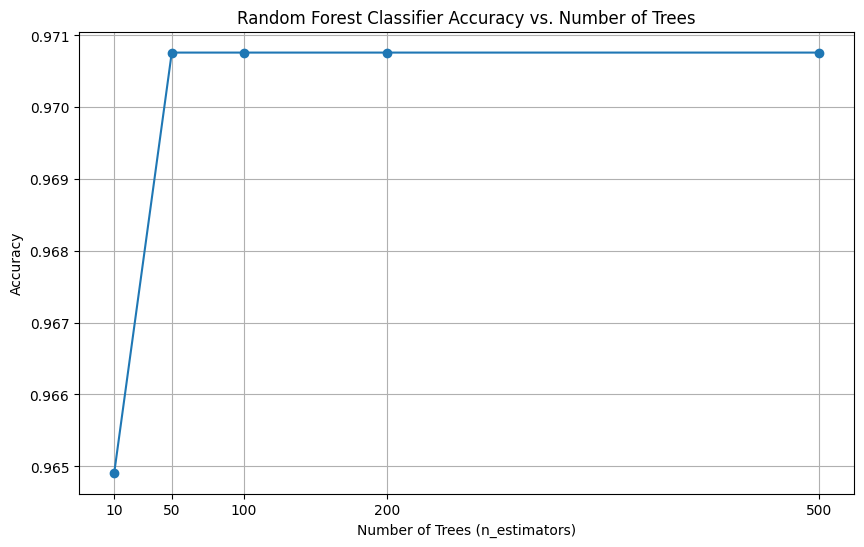

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='-')
plt.title('Random Forest Classifier Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

28.  Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

### 1. Generate a sample dataset

In [30]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_lr, y_lr = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Dataset shape for Logistic Regression Bagging: X={X_lr.shape}, y={y_lr.shape}")

Dataset shape for Logistic Regression Bagging: X=(1000, 20), y=(1000,)


### 2. Split the data into training and testing sets

In [31]:
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

print(f"Training data shape for Logistic Regression Bagging: X_train={X_train_lr.shape}, y_train={y_train_lr.shape}")
print(f"Testing data shape for Logistic Regression Bagging: X_test={X_test_lr.shape}, y_test={y_test_lr.shape}")

Training data shape for Logistic Regression Bagging: X_train=(700, 20), y_train=(700,)
Testing data shape for Logistic Regression Bagging: X_test=(300, 20), y_test=(300,)


### 3. Initialize and train a Bagging Classifier with Logistic Regression as base estimator

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Initialize a Logistic Regression model as the base estimator
# max_iter is increased to ensure convergence
base_estimator_lr = LogisticRegression(random_state=42, solver='liblinear', max_iter=500)

# Initialize the Bagging Classifier
# n_estimators: number of base estimators (Logistic Regression models) in the ensemble
# random_state: for reproducibility
# n_jobs: use all available CPU cores for parallel training
bagging_lr_clf = BaggingClassifier(
    estimator=base_estimator_lr,
    n_estimators=10, # Using 10 Logistic Regression models
    random_state=42,
    n_jobs=-1, # Use all available CPU cores for parallel training
    max_samples=0.8 # Use 80% of samples for each base estimator to introduce more diversity
)

# Train the Bagging Classifier
print("Training Bagging Classifier with Logistic Regression base estimators...")
bagging_lr_clf.fit(X_train_lr, y_train_lr)
print("Bagging Classifier with Logistic Regression base estimators trained successfully.")

Training Bagging Classifier with Logistic Regression base estimators...
Bagging Classifier with Logistic Regression base estimators trained successfully.


### 4. Make predictions and print AUC score

In [33]:
from sklearn.metrics import roc_auc_score

# Make probability predictions on the test set (needed for AUC score)
y_pred_proba_lr = bagging_lr_clf.predict_proba(X_test_lr)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test_lr, y_pred_proba_lr)

print(f"Bagging Classifier (with Logistic Regression base) AUC Score: {auc_score:.4f}")

Bagging Classifier (with Logistic Regression base) AUC Score: 0.9133


29. Train a Random Forest Regressor and analyze feature importance scores.

### 1. Generate a sample dataset for regression

In [34]:
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X_rf_reg, y_rf_reg = make_regression(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_targets=1,             # Number of target variables
    noise=50,                # Standard deviation of the gaussian noise
    random_state=42          # For reproducibility
)

print(f"Regression Dataset shape: X_rf_reg={X_rf_reg.shape}, y_rf_reg={y_rf_reg.shape}")

Regression Dataset shape: X_rf_reg=(1000, 20), y_rf_reg=(1000,)


### 2. Split the data into training and testing sets

In [35]:
from sklearn.model_selection import train_test_split

X_train_rf_reg, X_test_rf_reg, y_train_rf_reg, y_test_rf_reg = train_test_split(X_rf_reg, y_rf_reg, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_rf_reg={X_train_rf_reg.shape}, y_train_rf_reg={y_train_rf_reg.shape}")
print(f"Testing data shape: X_test_rf_reg={X_test_rf_reg.shape}, y_test_rf_reg={y_test_rf_reg.shape}")

Training data shape: X_train_rf_reg=(700, 20), y_train_rf_reg=(700,)
Testing data shape: X_test_rf_reg=(300, 20), y_test_rf_reg=(300,)


### 3. Initialize and train a Random Forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# n_jobs: use all available CPU cores for parallel training
rf_reg_importance = RandomForestRegressor(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)

# Train the Random Forest Regressor
rf_reg_importance.fit(X_train_rf_reg, y_train_rf_reg)
print("Random Forest Regressor trained successfully.")

Random Forest Regressor trained successfully.


### 4. Analyze feature importance scores

In [37]:
import pandas as pd

# Get feature importances from the trained model
feature_importances_reg = rf_reg_importance.feature_importances_

# For synthetic datasets, feature names are not directly available.
# We can create generic names (e.g., 'Feature 0', 'Feature 1', ...)
feature_names_reg = [f'Feature {i}' for i in range(X_rf_reg.shape[1])]

# Create a DataFrame for better visualization of feature importances
importance_df_reg = pd.DataFrame({
    'Feature': feature_names_reg,
    'Importance': feature_importances_reg
})

# Sort the features by importance in descending order
importance_df_reg = importance_df_reg.sort_values(by='Importance', ascending=False)

print("Feature Importances (Mean Decrease in Impurity) for Random Forest Regressor:")
print(importance_df_reg)

Feature Importances (Mean Decrease in Impurity) for Random Forest Regressor:
       Feature  Importance
1    Feature 1    0.230329
17  Feature 17    0.184639
4    Feature 4    0.165189
0    Feature 0    0.127123
6    Feature 6    0.111161
11  Feature 11    0.025657
15  Feature 15    0.019459
16  Feature 16    0.013616
10  Feature 10    0.011839
5    Feature 5    0.011539
19  Feature 19    0.011481
8    Feature 8    0.011318
18  Feature 18    0.010493
13  Feature 13    0.010346
14  Feature 14    0.010016
12  Feature 12    0.009729
9    Feature 9    0.009116
7    Feature 7    0.009016
3    Feature 3    0.008977
2    Feature 2    0.008960


 30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

### 1. Generate a sample dataset for classification

In [38]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_ensemble, y_ensemble = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Ensemble Comparison Dataset shape: X={X_ensemble.shape}, y={y_ensemble.shape}")

Ensemble Comparison Dataset shape: X=(1000, 20), y=(1000,)


### 2. Split the data into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split

X_train_ensemble, X_test_ensemble, y_train_ensemble, y_test_ensemble = train_test_split(X_ensemble, y_ensemble, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_ensemble={X_train_ensemble.shape}, y_train_ensemble={y_train_ensemble.shape}")
print(f"Testing data shape: X_test_ensemble={X_test_ensemble.shape}, y_test_ensemble={y_test_ensemble.shape}")

Training data shape: X_train_ensemble=(700, 20), y_train_ensemble=(700,)
Testing data shape: X_test_ensemble=(300, 20), y_test_ensemble=(300,)


### 3. Train a Bagging Classifier (using Decision Trees)

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a Decision Tree Classifier as the base estimator for Bagging
bagging_base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_clf_comp = BaggingClassifier(
    estimator=bagging_base_estimator,
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)

# Train the Bagging Classifier
bagging_clf_comp.fit(X_train_ensemble, y_train_ensemble)

# Make predictions and evaluate accuracy
y_pred_bagging = bagging_clf_comp.predict(X_test_ensemble)
accuracy_bagging = accuracy_score(y_test_ensemble, y_pred_bagging)

print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Bagging Classifier Accuracy: 0.9133


### 4. Train a Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf_comp = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)

# Train the Random Forest Classifier
rf_clf_comp.fit(X_train_ensemble, y_train_ensemble)

# Make predictions and evaluate accuracy
y_pred_rf_comp = rf_clf_comp.predict(X_test_ensemble)
accuracy_rf_comp = accuracy_score(y_test_ensemble, y_pred_rf_comp)

print(f"Random Forest Classifier Accuracy: {accuracy_rf_comp:.4f}")

Random Forest Classifier Accuracy: 0.9167


### 5. Compare the performance

In [42]:
print(f"\n--- Ensemble Model Accuracy Comparison ---")
print(f"Bagging Classifier Accuracy:   {accuracy_bagging:.4f}")
print(f"Random Forest Classifier Accuracy: {accuracy_rf_comp:.4f}")

if accuracy_rf_comp > accuracy_bagging:
    print("\nIn this comparison, the Random Forest Classifier performed slightly better than the Bagging Classifier.")
elif accuracy_bagging > accuracy_rf_comp:
    print("\nIn this comparison, the Bagging Classifier performed slightly better than the Random Forest Classifier.")
else:
    print("\nBoth Bagging Classifier and Random Forest Classifier achieved the same accuracy.")

print("\nThis difference often arises because Random Forests add an extra layer of randomness (feature subsampling at each split) which further decorrelates the trees, potentially leading to better generalization than pure Bagging with Decision Trees.")


--- Ensemble Model Accuracy Comparison ---
Bagging Classifier Accuracy:   0.9133
Random Forest Classifier Accuracy: 0.9167

In this comparison, the Random Forest Classifier performed slightly better than the Bagging Classifier.

This difference often arises because Random Forests add an extra layer of randomness (feature subsampling at each split) which further decorrelates the trees, potentially leading to better generalization than pure Bagging with Decision Trees.


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

### 1. Load the Breast Cancer dataset

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data_grid = load_breast_cancer()
X_grid = data_grid.data
y_grid = data_grid.target

print(f"Breast Cancer Dataset shape: X={X_grid.shape}, y={y_grid.shape}")

Breast Cancer Dataset shape: X=(569, 30), y=(569,)


### 2. Split the data into training and testing sets

In [44]:
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_grid, y_grid, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_grid={X_train_grid.shape}, y_train_grid={y_train_grid.shape}")
print(f"Testing data shape: X_test_grid={X_test_grid.shape}, y_test_grid={y_test_grid.shape}")

Training data shape: X_train_grid=(398, 30), y_train_grid=(398,)
Testing data shape: X_test_grid=(171, 30), y_test_grid=(171,)


### 3. Define the parameter grid and run GridSearchCV

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier
rf_clf_grid = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], # Number of trees in the forest
    'max_depth': [None, 10, 20],   # Maximum depth of the tree
    'min_samples_split': [2, 5],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]     # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# estimator: The model to tune
# param_grid: The dictionary of hyperparameters to search
# cv: Number of folds for cross-validation
# scoring: Metric to optimize (e.g., 'accuracy' for classification)
# n_jobs: Number of jobs to run in parallel (-1 means use all available processors)
grid_search = GridSearchCV(
    estimator=rf_clf_grid,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1 # To see progress
)

print("Starting GridSearchCV to find the best hyperparameters...")
grid_search.fit(X_train_grid, y_train_grid)
print("GridSearchCV completed.")

Starting GridSearchCV to find the best hyperparameters...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
GridSearchCV completed.


### 4. Print the best parameters and best score

In [46]:
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best cross-validation accuracy: 0.9572


### 5. Evaluate the best model on the test set

In [47]:
from sklearn.metrics import accuracy_score

# Get the best model found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best_rf = best_rf_model.predict(X_test_grid)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test_grid, y_pred_best_rf)

print(f"Test set accuracy with the best Random Forest model: {test_accuracy:.4f}")

Test set accuracy with the best Random Forest model: 0.9708


32.  Train a Bagging Regressor with different numbers of base estimators and compare performance.

# Task
Generate a synthetic regression dataset with 1000 samples and 20 features, including some noise, then split it into training and testing sets. Train multiple `BaggingRegressor` models with varying numbers of base estimators (Decision Trees). For each model, calculate the Mean Squared Error (MSE) on the test set and plot the MSE against the number of estimators. Finally, summarize the relationship between the number of estimators and the `BaggingRegressor`'s performance.

## Generate Regression Dataset

### Subtask:
Generate a synthetic regression dataset using `make_regression` with 1000 samples, 20 features, and some noise.


**Reasoning**:
The subtask asks to generate a synthetic regression dataset using `make_regression` with specific parameters and then print its shape. This code block directly addresses these requirements.



In [48]:
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X_reg_comp, y_reg_comp = make_regression(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_targets=1,             # Number of target variables
    noise=50,                # Standard deviation of the gaussian noise
    random_state=42          # For reproducibility
)

print(f"Regression Dataset shape: X_reg_comp={X_reg_comp.shape}, y_reg_comp={y_reg_comp.shape}")

Regression Dataset shape: X_reg_comp=(1000, 20), y_reg_comp=(1000,)


## Split Data into Training and Testing Sets

### Subtask:
Split the generated regression dataset (`X_reg_comp`, `y_reg_comp`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X_reg_comp` and `y_reg_comp` into `X_train_reg_comp`, `X_test_reg_comp`, `y_train_reg_comp`, and `y_test_reg_comp` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets.

**Reasoning**:
This code block directly addresses the subtask's instructions to split the data into training and testing sets using `train_test_split` and print their shapes.



In [49]:
from sklearn.model_selection import train_test_split

X_train_reg_comp, X_test_reg_comp, y_train_reg_comp, y_test_reg_comp = train_test_split(X_reg_comp, y_reg_comp, test_size=0.3, random_state=42)

print(f"Regression Training data shape: X_train_reg_comp={X_train_reg_comp.shape}, y_train_reg_comp={y_train_reg_comp.shape}")
print(f"Regression Testing data shape: X_test_reg_comp={X_test_reg_comp.shape}, y_test_reg_comp={y_test_reg_comp.shape}")

Regression Training data shape: X_train_reg_comp=(700, 20), y_train_reg_comp=(700,)
Regression Testing data shape: X_test_reg_comp=(300, 20), y_test_reg_comp=(300,)


## Train Bagging Regressors with Varying `n_estimators` and Evaluate Performance

### Subtask:
Train multiple `BaggingRegressor` models with different numbers of base estimators (Decision Trees) and calculate the Mean Squared Error (MSE) for each on the test set.

#### Instructions
1. Import `BaggingRegressor` from `sklearn.ensemble` and `DecisionTreeRegressor` from `sklearn.tree`.
2. Import `mean_squared_error` from `sklearn.metrics`.
3. Define a list of `n_estimators` values to test (e.g., `[10, 50, 100, 200, 500]`).
4. Initialize an empty list to store MSE values.
5. Loop through the `n_estimators_list`:
    a. For each `n_estimators` value, initialize a `BaggingRegressor` with `DecisionTreeRegressor` as the `estimator`, `n_estimators=current_n_estimators`, `random_state=42`, and `n_jobs=-1`.
    b. Train the `BaggingRegressor` on the training data (`X_train_reg_comp`, `y_train_reg_comp`).
    c. Make predictions on the test set (`X_test_reg_comp`).
    d. Calculate the Mean Squared Error (MSE) between the predictions and the true test labels (`y_test_reg_comp`).
    e. Store the calculated MSE.
    f. Print the `n_estimators` value and its corresponding MSE.

**Reasoning**:
This code block directly addresses the subtask's instructions to train multiple `BaggingRegressor` models with varying numbers of estimators, calculate their MSE, and print the results.



In [50]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define a list of n_estimators values to test
n_estimators_list = [10, 50, 100, 200, 500]
mse_values = []

for n_estimators in n_estimators_list:
    print(f"Training Bagging Regressor with {n_estimators} estimators...")
    # Initialize a Decision Tree Regressor as the base estimator
    base_estimator_br = DecisionTreeRegressor(random_state=42)

    # Initialize the Bagging Regressor
    bagging_reg_comp = BaggingRegressor(
        estimator=base_estimator_br,
        n_estimators=n_estimators,
        random_state=42,
        n_jobs=-1 # Use all available CPU cores for parallel training
    )

    # Train the Bagging Regressor
    bagging_reg_comp.fit(X_train_reg_comp, y_train_reg_comp)

    # Make predictions on the test set
    y_pred_br = bagging_reg_comp.predict(X_test_reg_comp)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test_reg_comp, y_pred_br)
    mse_values.append(mse)
    print(f"  MSE with {n_estimators} estimators: {mse:.4f}")

print("\nAll Bagging Regressors trained and evaluated successfully.")

Training Bagging Regressor with 10 estimators...
  MSE with 10 estimators: 11537.4632
Training Bagging Regressor with 50 estimators...
  MSE with 50 estimators: 9752.0874
Training Bagging Regressor with 100 estimators...
  MSE with 100 estimators: 9617.3688
Training Bagging Regressor with 200 estimators...
  MSE with 200 estimators: 9295.5479
Training Bagging Regressor with 500 estimators...
  MSE with 500 estimators: 9259.7100

All Bagging Regressors trained and evaluated successfully.


## Plot MSE vs. Number of Estimators

### Subtask:
Plot the Mean Squared Error (MSE) against the number of estimators (`n_estimators`) to visualize the Bagging Regressor's performance trend.

#### Instructions
1. Import `matplotlib.pyplot` as `plt`.
2. Create a plot with `n_estimators_list` on the x-axis and `mse_values` on the y-axis.
3. Add a title, x-label, and y-label to the plot.
4. Add a grid for better readability.
5. Display the plot.

**Reasoning**:
The previous step calculated and stored the MSE values for different numbers of estimators. The next logical step is to visualize this relationship as described in the subtask.



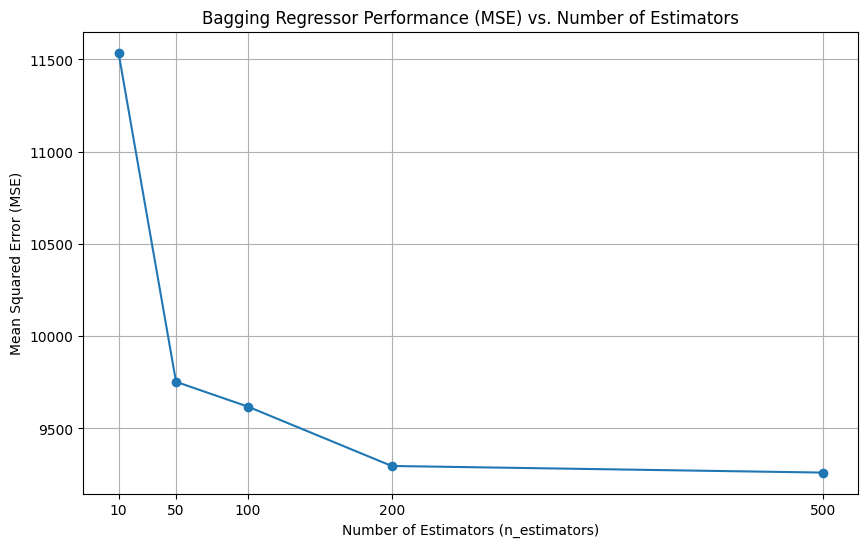

In [51]:
import matplotlib.pyplot as plt

# Plot the MSE values against the number of estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_values, marker='o', linestyle='-')
plt.title('Bagging Regressor Performance (MSE) vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(n_estimators_list)
plt.grid(True)
plt.show()

33. Train a Random Forest Classifier and analyze misclassified samples.


## Load Breast Cancer Dataset

### Subtask:
Load the Breast Cancer dataset from `sklearn.datasets`.


**Reasoning**:
The subtask requires loading the Breast Cancer dataset, storing features and target in specified variables, and printing their shapes. This code block directly addresses these instructions.



In [52]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data_misc = load_breast_cancer()
X_bc_misc = data_misc.data
y_bc_misc = data_misc.target

print(f"Breast Cancer Dataset shape: X_bc_misc={X_bc_misc.shape}, y_bc_misc={y_bc_misc.shape}")

Breast Cancer Dataset shape: X_bc_misc=(569, 30), y_bc_misc=(569,)


## Split Data into Training and Testing Sets

### Subtask:
Split the loaded Breast Cancer dataset (`X_bc_misc`, `y_bc_misc`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X_bc_misc` and `y_bc_misc` into `X_train_bc_misc`, `X_test_bc_misc`, `y_train_bc_misc`, and `y_test_bc_misc` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

**Reasoning**:
The previous markdown block outlined the instructions for splitting the dataset. This code block will now perform the actual splitting of the Breast Cancer dataset into training and testing sets, as well as printing their shapes, as per the subtask requirements.



In [53]:
from sklearn.model_selection import train_test_split

X_train_bc_misc, X_test_bc_misc, y_train_bc_misc, y_test_bc_misc = train_test_split(X_bc_misc, y_bc_misc, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_bc_misc={X_train_bc_misc.shape}, y_train_bc_misc={y_train_bc_misc.shape}")
print(f"Testing data shape: X_test_bc_misc={X_test_bc_misc.shape}, y_test_bc_misc={y_test_bc_misc.shape}")

Training data shape: X_train_bc_misc=(398, 30), y_train_bc_misc=(398,)
Testing data shape: X_test_bc_misc=(171, 30), y_test_bc_misc=(171,)


## Train Random Forest Classifier

### Subtask:
Initialize and train a `RandomForestClassifier` on the training data.

#### Instructions
1. Import `RandomForestClassifier` from `sklearn.ensemble`.
2. Initialize a `RandomForestClassifier` with `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
3. Train the classifier on `X_train_bc_misc` and `y_train_bc_misc`.
4. Print a confirmation message that the classifier has been trained.

## Train Random Forest Classifier

### Subtask:
Initialize and train a `RandomForestClassifier` on the training data.

#### Instructions
1. Import `RandomForestClassifier` from `sklearn.ensemble`.
2. Initialize a `RandomForestClassifier` with `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
3. Train the classifier on `X_train_bc_misc` and `y_train_bc_misc`.
4. Print a confirmation message that the classifier has been trained.

**Reasoning**:
The previous markdown block outlined the instructions for training a Random Forest Classifier. This code block will now implement those instructions by initializing and training the classifier on the prepared training data.



In [54]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf_misc = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1         # Use all available CPU cores for parallel training
)

# Train the Random Forest Classifier
rf_clf_misc.fit(X_train_bc_misc, y_train_bc_misc)
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Analyze Misclassified Samples

### Subtask:
Make predictions on the test set, identify the misclassified samples, and print their count.

#### Instructions
1. Make predictions on `X_test_bc_misc` using the trained `rf_clf_misc`.
2. Compare these predictions with the true labels `y_test_bc_misc` to find misclassified samples.
3. Print the total number of test samples and the number of misclassified samples.

**Reasoning**:
The previous markdown block outlined the instructions for analyzing misclassified samples. This code block will now make predictions on the test set, identify the misclassified samples, and print their count as per the subtask requirements.



In [55]:
import numpy as np

# Make predictions on the test set
y_pred_bc_misc = rf_clf_misc.predict(X_test_bc_misc)

# Identify misclassified samples
misclassified_samples = np.where(y_pred_bc_misc != y_test_bc_misc)[0]

# Count the number of misclassified samples
num_misclassified = len(misclassified_samples)

# Get the total number of test samples
total_test_samples = len(y_test_bc_misc)

print(f"Total number of test samples: {total_test_samples}")
print(f"Number of misclassified samples: {num_misclassified}")
print(f"Accuracy on test set: {(total_test_samples - num_misclassified) / total_test_samples:.4f}")

Total number of test samples: 171
Number of misclassified samples: 5
Accuracy on test set: 0.9708


## Display Misclassified Samples

### Subtask:
Display relevant information (e.g., true label, predicted label, and feature values) for a few of the identified misclassified samples.


**Reasoning**:
This code block will iterate through the identified misclassified samples, retrieve their true labels, predicted labels, and feature values, then display them in a human-readable format, as per the subtask instructions.



In [56]:
import pandas as pd

# Get feature names
feature_names_misc = data_misc.feature_names

print("\n--- Analysis of Misclassified Samples ---")

# Display details for a few misclassified samples (e.g., first 5)
num_to_display = min(len(misclassified_samples), 5)

if num_misclassified == 0:
    print("No misclassified samples found in the test set. The model performed perfectly on the test set!")
else:
    for i, sample_idx in enumerate(misclassified_samples[:num_to_display]):
        print(f"\nMisclassified Sample {i + 1} (Original Test Index: {sample_idx}):")
        print(f"  True Label: {data_misc.target_names[y_test_bc_misc[sample_idx]]}")
        print(f"  Predicted Label: {data_misc.target_names[y_pred_bc_misc[sample_idx]]}")

        # Display feature values
        features = pd.Series(X_test_bc_misc[sample_idx], index=feature_names_misc)
        print("  Feature Values:")
        print(features.to_string())



--- Analysis of Misclassified Samples ---

Misclassified Sample 1 (Original Test Index: 8):
  True Label: benign
  Predicted Label: malignant
  Feature Values:
mean radius                 13.340000
mean texture                15.860000
mean perimeter              86.490000
mean area                  520.000000
mean smoothness              0.107800
mean compactness             0.153500
mean concavity               0.116900
mean concave points          0.069870
mean symmetry                0.194200
mean fractal dimension       0.069020
radius error                 0.286000
texture error                1.016000
perimeter error              1.535000
area error                  12.960000
smoothness error             0.006794
compactness error            0.035750
concavity error              0.039800
concave points error         0.013830
symmetry error               0.021340
fractal dimension error      0.004603
worst radius                15.530000
worst texture               23.190000
wor

34.  Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

# Task
The user wants to compare the performance of a Bagging Classifier against a single Decision Tree Classifier. To achieve this, I will:

1.  Generate a synthetic classification dataset.
2.  Split the dataset into training and testing sets.
3.  Train a single `DecisionTreeClassifier` and evaluate its accuracy.
4.  Train a `BaggingClassifier` (using `DecisionTreeClassifier` as base estimators) and evaluate its accuracy.
5.  Compare and print the accuracies of both models.

This will demonstrate how bagging can improve performance over a single base estimator.
```python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)
print(f"Dataset shape: X={X.shape}, y={y.shape}")

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}\n")

# 3. Train a single Decision Tree Classifier
print("Training Single Decision Tree Classifier...")
single_dt_clf = DecisionTreeClassifier(random_state=42)
single_dt_clf.fit(X_train, y_train)

y_pred_dt = single_dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Single Decision Tree Classifier Accuracy: {accuracy_dt:.4f}\n")

# 4. Train a Bagging Classifier (with Decision Trees as base estimators)
print("Training Bagging Classifier...")
bagging_dt_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100, # Number of base estimators
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)
bagging_dt_clf.fit(X_train, y_train)

y_pred_bagging = bagging_dt_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}\n")

# 5. Compare the performances
print("--- Performance Comparison ---")
print(f"Single Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Bagging Classifier Accuracy:   {accuracy_bagging:.4f}")

# 6. Summarize and explain the differences
if accuracy_bagging > accuracy_dt:
    print("\nObservation: The Bagging Classifier achieved higher accuracy than the single Decision Tree Classifier.")
    print("Explanation: Bagging reduces variance by training multiple base estimators on different bootstrap samples of the data and then aggregating their predictions. This process smooths out individual errors and reduces the impact of overfitting from any single tree, leading to better generalization and often higher accuracy.")
elif accuracy_dt > accuracy_bagging:
    print("\nObservation: The Single Decision Tree Classifier achieved higher accuracy than the Bagging Classifier in this instance.")
    print("Explanation: While Bagging typically outperforms a single decision tree, there might be cases, especially with very simple datasets or specific random states, where a single tree happens to perform marginally better. However, in general, Bagging is designed to be more robust.")
else:
    print("\nObservation: Both the Single Decision Tree Classifier and Bagging Classifier achieved the same accuracy.")
    print("Explanation: This can happen if the dataset is very easy to classify or if the inherent variability reduced by Bagging is minimal in this specific scenario.")

# Optional: Plot for visualization
labels = ['Single Decision Tree', 'Bagging Classifier']
accuracies = [accuracy_dt, accuracy_bagging]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(min(accuracies) * 0.9, 1.0) # Adjust y-axis limits for better visualization
plt.show()
```

## Generate Classification Dataset

### Subtask:
Generate a synthetic classification dataset using `make_classification`.


**Reasoning**:
The subtask asks to generate a synthetic classification dataset using `make_classification` with specific parameters and then print its shape. This code block directly addresses these requirements.



In [57]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_compare, y_compare = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Classification Dataset shape: X_compare={X_compare.shape}, y_compare={y_compare.shape}")

Classification Dataset shape: X_compare=(1000, 20), y_compare=(1000,)


## Split Data into Training and Testing Sets

### Subtask:
Split the generated classification dataset (`X_compare`, `y_compare`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X_compare` and `y_compare` into `X_train_compare`, `X_test_compare`, `y_train_compare`, and `y_test_compare` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

**Reasoning**:
The previous markdown block outlined the instructions for splitting the dataset. This code block will now perform the actual splitting of the classification dataset into training and testing sets, as well as printing their shapes, as per the subtask requirements.



In [58]:
from sklearn.model_selection import train_test_split

X_train_compare, X_test_compare, y_train_compare, y_test_compare = train_test_split(X_compare, y_compare, test_size=0.3, random_state=42)

print(f"Training data shape for comparison: X_train={X_train_compare.shape}, y_train={y_train_compare.shape}")
print(f"Testing data shape for comparison: X_test={X_test_compare.shape}, y_test={y_test_compare.shape}")

Training data shape for comparison: X_train=(700, 20), y_train=(700,)
Testing data shape for comparison: X_test=(300, 20), y_test=(300,)


## Train Single Decision Tree Classifier

### Subtask:
Train a single `DecisionTreeClassifier` on the training data and evaluate its accuracy.

#### Instructions
1. Import `DecisionTreeClassifier` from `sklearn.tree`.
2. Import `accuracy_score` from `sklearn.metrics`.
3. Initialize a `DecisionTreeClassifier` with `random_state=42`.
4. Train the classifier on `X_train_compare` and `y_train_compare`.
5. Make predictions on `X_test_compare`.
6. Calculate the accuracy score between `y_test_compare` and the predictions.
7. Print the accuracy of the single Decision Tree Classifier.

**Reasoning**:
The previous markdown block outlined the instructions for training a single Decision Tree Classifier. This code block will now implement those instructions by initializing and training the classifier on the prepared training data and then evaluating its accuracy.



In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a single Decision Tree Classifier
single_dt_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
single_dt_clf.fit(X_train_compare, y_train_compare)

# Make predictions on the test set
y_pred_dt_compare = single_dt_clf.predict(X_test_compare)

# Calculate the accuracy
accuracy_dt_compare = accuracy_score(y_test_compare, y_pred_dt_compare)

print(f"Single Decision Tree Classifier Accuracy: {accuracy_dt_compare:.4f}")

Single Decision Tree Classifier Accuracy: 0.8167


## Train Bagging Classifier

### Subtask:
Train a `BaggingClassifier` using `DecisionTreeClassifier` as base estimators and evaluate its accuracy.

#### Instructions
1. Import `BaggingClassifier` from `sklearn.ensemble`.
2. Initialize a `BaggingClassifier` with `DecisionTreeClassifier(random_state=42)` as the base `estimator`, `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
3. Train the `BaggingClassifier` on `X_train_compare` and `y_train_compare`.
4. Make predictions on `X_test_compare`.
5. Calculate the accuracy score between `y_test_compare` and the predictions.
6. Print the accuracy of the Bagging Classifier.

**Reasoning**:
The previous markdown block outlined the instructions for training a Bagging Classifier. This code block will now implement those instructions by initializing and training the classifier on the prepared training data and then evaluating its accuracy.



In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator for Bagging
bagging_base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_dt_clf = BaggingClassifier(
    estimator=bagging_base_estimator,
    n_estimators=100, # Number of base estimators
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

# Train the Bagging Classifier
bagging_dt_clf.fit(X_train_compare, y_train_compare)

# Make predictions on the test set
y_pred_bagging = bagging_dt_clf.predict(X_test_compare)

# Calculate the accuracy
accuracy_bagging = accuracy_score(y_test_compare, y_pred_bagging)

print(f"Bagging Classifier Accuracy: {accuracy_bagging:.4f}")

Bagging Classifier Accuracy: 0.9133


**Reasoning**:
Both the single Decision Tree Classifier and the Bagging Classifier have been trained and evaluated. The next step is to compare their accuracies to understand the performance difference between a single model and an ensemble model, and then visualize this comparison.



-- Performance Comparison --
Single Decision Tree Accuracy: 0.8167
Bagging Classifier Accuracy:   0.9133

Observation: The Bagging Classifier achieved higher accuracy than the single Decision Tree Classifier.
Explanation: Bagging reduces variance by training multiple base estimators on different bootstrap samples of the data and then aggregating their predictions. This process smooths out individual errors and reduces the impact of overfitting from any single tree, leading to better generalization and often higher accuracy.


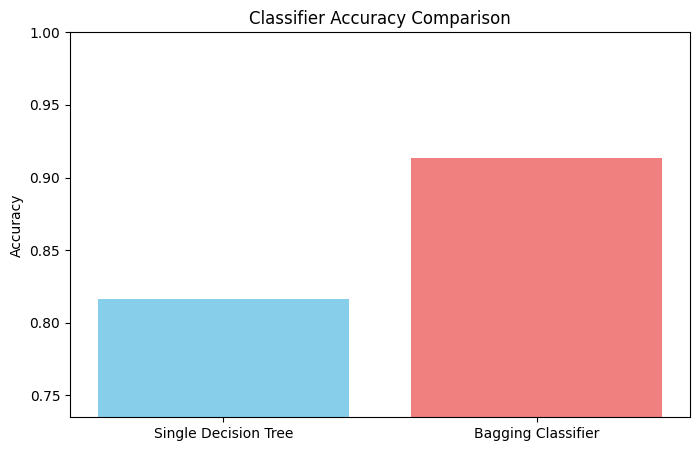

In [61]:
import matplotlib.pyplot as plt

# 5. Compare the performances
print("-- Performance Comparison --")
print(f"Single Decision Tree Accuracy: {accuracy_dt_compare:.4f}")
print(f"Bagging Classifier Accuracy:   {accuracy_bagging:.4f}")

# 6. Summarize and explain the differences
if accuracy_bagging > accuracy_dt_compare:
    print("\nObservation: The Bagging Classifier achieved higher accuracy than the single Decision Tree Classifier.")
    print("Explanation: Bagging reduces variance by training multiple base estimators on different bootstrap samples of the data and then aggregating their predictions. This process smooths out individual errors and reduces the impact of overfitting from any single tree, leading to better generalization and often higher accuracy.")
elif accuracy_dt_compare > accuracy_bagging:
    print("\nObservation: The Single Decision Tree Classifier achieved higher accuracy than the Bagging Classifier in this instance.")
    print("Explanation: While Bagging typically outperforms a single decision tree, there might be cases, especially with very simple datasets or specific random states, where a single tree happens to perform marginally better. However, in general, Bagging is designed to be more robust.")
else:
    print("\nObservation: Both the Single Decision Tree Classifier and Bagging Classifier achieved the same accuracy.")
    print("Explanation: This can happen if the dataset is very easy to classify or if the inherent variability reduced by Bagging is minimal in this specific scenario.")

# Optional: Plot for visualization
labels = ['Single Decision Tree', 'Bagging Classifier']
accuracies = [accuracy_dt_compare, accuracy_bagging]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(min(accuracies) * 0.9, 1.0) # Adjust y-axis limits for better visualization
plt.show()

35. Train a Random Forest Classifier and visualize the confusion matrix.

# Task
## Train Random Forest Classifier

### Subtask:
Initialize and train a `RandomForestClassifier` on the training data.

#### Instructions
1. Import `RandomForestClassifier` from `sklearn.ensemble`.
2. Initialize a `RandomForestClassifier` with `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
3. Train the classifier on `X_train_bc_misc` and `y_train_bc_misc`.
4. Print a confirmation message that the classifier has been trained.

## Load Breast Cancer Dataset

### Subtask:
Load the Breast Cancer dataset from `sklearn.datasets`.


**Reasoning**:
The subtask asks to load the Breast Cancer dataset, store features and target in specified variables, and print their shapes. This code block directly addresses these instructions.



In [62]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data_bc = load_breast_cancer()
X_bc_cm = data_bc.data
y_bc_cm = data_bc.target

print(f"Breast Cancer Dataset shape: X_bc_cm={X_bc_cm.shape}, y_bc_cm={y_bc_cm.shape}")

Breast Cancer Dataset shape: X_bc_cm=(569, 30), y_bc_cm=(569,)


## Split Data into Training and Testing Sets

### Subtask:
Split the loaded Breast Cancer dataset (`X_bc_cm`, `y_bc_cm`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X_bc_cm` and `y_bc_cm` into `X_train_bc_cm`, `X_test_bc_cm`, `y_train_bc_cm`, and `y_test_bc_cm` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

**Reasoning**:
The previous markdown block outlined the instructions for splitting the dataset. This code block will now perform the actual splitting of the Breast Cancer dataset into training and testing sets, as well as printing their shapes, as per the subtask requirements.



In [63]:
from sklearn.model_selection import train_test_split

X_train_bc_cm, X_test_bc_cm, y_train_bc_cm, y_test_bc_cm = train_test_split(X_bc_cm, y_bc_cm, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_bc_cm={X_train_bc_cm.shape}, y_train_bc_cm={y_train_bc_cm.shape}")
print(f"Testing data shape: X_test_bc_cm={X_test_bc_cm.shape}, y_test_bc_cm={y_test_bc_cm.shape}")

Training data shape: X_train_bc_cm=(398, 30), y_train_bc_cm=(398,)
Testing data shape: X_test_bc_cm=(171, 30), y_test_bc_cm=(171,)


## Train Random Forest Classifier

### Subtask:
Initialize and train a `RandomForestClassifier` on the training data.

#### Instructions
1. Import `RandomForestClassifier` from `sklearn.ensemble`.
2. Initialize a `RandomForestClassifier` with `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
3. Train the classifier on `X_train_bc_cm` and `y_train_bc_cm`.
4. Print a confirmation message that the classifier has been trained.

**Reasoning**:
The previous markdown block outlined the instructions for training a Random Forest Classifier. This code block will now implement those instructions by initializing and training the classifier on the prepared training data.



In [64]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf_cm = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1         # Use all available CPU cores for parallel training
)

# Train the Random Forest Classifier
rf_clf_cm.fit(X_train_bc_cm, y_train_bc_cm)
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Visualize the Confusion Matrix

### Subtask:
Make predictions on the test set and visualize the confusion matrix to assess the classifier's performance.

#### Instructions
1. Import `confusion_matrix` and `ConfusionMatrixDisplay` from `sklearn.metrics`.
2. Import `matplotlib.pyplot` as `plt`.
3. Make predictions on the test set (`X_test_bc_cm`) using the trained `rf_clf_cm`.
4. Compute the confusion matrix using `confusion_matrix`, providing `y_test_bc_cm` and the predictions.
5. Create a `ConfusionMatrixDisplay` object from the computed confusion matrix and `display_labels`.
6. Plot the confusion matrix using `disp.plot()`.
7. Add a title to the plot.
8. Display the plot using `plt.show()`.

**Reasoning**:
The previous markdown block outlined the instructions for visualizing the confusion matrix. This code block will now implement those instructions by making predictions, computing the confusion matrix, and then plotting it.



<Figure size 800x600 with 0 Axes>

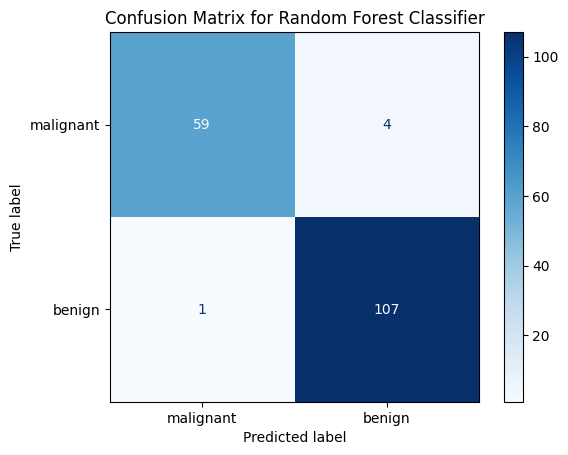

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_cm = rf_clf_cm.predict(X_test_bc_cm)

# Compute the confusion matrix
cm = confusion_matrix(y_test_bc_cm, y_pred_cm)

# Get class names for display
display_labels = data_bc.target_names

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

36.  Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

# Task
Generate a synthetic classification dataset with 1000 samples and 20 features, split it into training and testing sets, then train and evaluate a `StackingClassifier` using `DecisionTreeClassifier`, `SVC(probability=True)`, and `LogisticRegression` as base estimators, with `LogisticRegression` as the final meta-estimator. Summarize the accuracy achieved by the Stacking Classifier.

## Generate Classification Dataset

### Subtask:
Generate a synthetic classification dataset using `make_classification` with 1000 samples and 20 features.


**Reasoning**:
The subtask requires generating a synthetic classification dataset with specific parameters. This code block uses `make_classification` to create the dataset and then prints its shape as instructed.



In [66]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_stack, y_stack = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Dataset shape for Stacking: X_stack={X_stack.shape}, y_stack={y_stack.shape}")

Dataset shape for Stacking: X_stack=(1000, 20), y_stack=(1000,)


## Split Data into Training and Testing Sets

### Subtask:
Split the generated classification dataset (`X_stack`, `y_stack`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X_stack` and `y_stack` into `X_train_stack`, `X_test_stack`, `y_train_stack`, and `y_test_stack` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

**Reasoning**:
This code block implements the instructions to split the dataset into training and testing sets, and then prints the shapes of the resulting sets for verification.



In [67]:
from sklearn.model_selection import train_test_split

X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(X_stack, y_stack, test_size=0.3, random_state=42)

print(f"Training data shape for Stacking: X_train_stack={X_train_stack.shape}, y_train_stack={y_train_stack.shape}")
print(f"Testing data shape for Stacking: X_test_stack={X_test_stack.shape}, y_test_stack={y_test_stack.shape}")

Training data shape for Stacking: X_train_stack=(700, 20), y_train_stack=(700,)
Testing data shape for Stacking: X_test_stack=(300, 20), y_test_stack=(300,)


## Train Stacking Classifier

### Subtask:
Train a `StackingClassifier` using `DecisionTreeClassifier`, `SVC`, and `LogisticRegression` as base estimators, and `LogisticRegression` as the final meta-estimator.

#### Instructions
1. Import `StackingClassifier` from `sklearn.ensemble`.
2. Import `DecisionTreeClassifier` from `sklearn.tree`.
3. Import `SVC` from `sklearn.svm`.
4. Import `LogisticRegression` from `sklearn.linear_model`.
5. Define a list of base estimators: `estimators = [('dt', DecisionTreeClassifier(random_state=42)), ('svm', SVC(probability=True, random_state=42)), ('lr', LogisticRegression(solver='liblinear', random_state=42))]`.
6. Initialize the `StackingClassifier` with the defined `estimators`, `final_estimator=LogisticRegression(solver='liblinear', random_state=42)`, and `n_jobs=-1`.
7. Train the `StackingClassifier` on the training data (`X_train_stack`, `y_train_stack`).
8. Print a confirmation message that the Stacking Classifier has been trained.

**Reasoning**:
This code block directly implements the instructions to initialize and train a Stacking Classifier with the specified base estimators and meta-estimator on the prepared training data.



**Reasoning**:
The previous code failed because `StackingClassifier` does not accept a `random_state` parameter directly in its constructor. I need to remove `random_state=42` from the `StackingClassifier` initialization.



In [69]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define base estimators
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)), # probability=True is required for stacking with SVC
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]

# Initialize the Stacking Classifier
# final_estimator: The meta-model that learns how to best combine the predictions of the base estimators
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(solver='liblinear', random_state=42),
    n_jobs=-1, # Use all available CPU cores for parallel training
    cv=5 # Use 5-fold cross-validation for training the meta-estimator
)

# Train the Stacking Classifier
print("Training Stacking Classifier... This might take a moment due to multiple models.")
stacking_clf.fit(X_train_stack, y_train_stack)
print("Stacking Classifier trained successfully.")

Training Stacking Classifier... This might take a moment due to multiple models.
Stacking Classifier trained successfully.


## Evaluate Stacking Classifier Performance

### Subtask:
Make predictions on the test set and calculate the accuracy score for the trained `StackingClassifier`.

#### Instructions
1. Import `accuracy_score` from `sklearn.metrics`.
2. Make predictions on `X_test_stack` using the trained `stacking_clf`.
3. Calculate the accuracy score between `y_test_stack` and the predictions.
4. Print the accuracy of the Stacking Classifier.

**Reasoning**:
This code block directly implements the instructions to make predictions on the test set and then calculate and print the accuracy score for the trained Stacking Classifier.



In [70]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_stack = stacking_clf.predict(X_test_stack)

# Calculate the accuracy
accuracy_stack = accuracy_score(y_test_stack, y_pred_stack)

print(f"Stacking Classifier Accuracy: {accuracy_stack:.4f}")

Stacking Classifier Accuracy: 0.9533


37.  Train a Random Forest Classifier and print the top 5 most important features.

### 1. Load the Breast Cancer dataset

In [71]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X_bc = data.data
y_bc = data.target

print(f"Breast Cancer Dataset shape: X={X_bc.shape}, y={y_bc.shape}")
print(f"Feature names: {data.feature_names}")

Breast Cancer Dataset shape: X=(569, 30), y=(569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 2. Split the data into training and testing sets

In [72]:
from sklearn.model_selection import train_test_split

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_bc={X_train_bc.shape}, y_train_bc={y_train_bc.shape}")
print(f"Testing data shape: X_test_bc={X_test_bc.shape}, y_test_bc={y_test_bc.shape}")

Training data shape: X_train_bc=(398, 30), y_train_bc=(398,)
Testing data shape: X_test_bc=(171, 30), y_test_bc=(171,)


### 3. Initialize and train a Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
# n_estimators: number of trees in the forest
# random_state: for reproducibility
# n_jobs: use all available CPU cores for parallel training
rf_clf_importance = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)

# Train the Random Forest Classifier
rf_clf_importance.fit(X_train_bc, y_train_bc)
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


### 4. Print the top 5 most important features

In [74]:
import pandas as pd

# Get feature importances from the trained model
feature_importances = rf_clf_importance.feature_importances_

# Get feature names from the dataset
feature_names = data.feature_names

# Create a DataFrame for better visualization of feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top 5 Most Important Features (Mean Decrease in Impurity):")
print(importance_df.head(5))

Top 5 Most Important Features (Mean Decrease in Impurity):
                 Feature  Importance
7    mean concave points    0.141934
27  worst concave points    0.127136
23            worst area    0.118217
6         mean concavity    0.080557
20          worst radius    0.077975


38.Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

# Task
## Generate Classification Dataset

### Subtask:
Generate a synthetic classification dataset using `make_classification` with 1000 samples and 20 features.

#### Instructions
1. Import `make_classification` from `sklearn.datasets`.
2. Generate a synthetic dataset `X_eval`, `y_eval` with `n_samples=1000`, `n_features=20`, `n_informative=10`, `n_redundant=5`, `n_classes=2`, and `random_state=42`.
3. Print the shapes of the generated dataset.

## Generate Classification Dataset

### Subtask:
Generate a synthetic classification dataset using `make_classification` with 1000 samples and 20 features.


**Reasoning**:
The subtask asks to generate a synthetic classification dataset using `make_classification` with specific parameters and then print its shape. This code block directly addresses these requirements.



In [75]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_eval, y_eval = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Classification Dataset shape: X_eval={X_eval.shape}, y_eval={y_eval.shape}")

Classification Dataset shape: X_eval=(1000, 20), y_eval=(1000,)


**Reasoning**:
The next step is to split the generated dataset into training and testing sets, as per the task requirements.



In [76]:
from sklearn.model_selection import train_test_split

X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_eval, y_eval, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_eval={X_train_eval.shape}, y_train_eval={y_train_eval.shape}")
print(f"Testing data shape: X_test_eval={X_test_eval.shape}, y_test_eval={y_test_eval.shape}")

Training data shape: X_train_eval=(700, 20), y_train_eval=(700,)
Testing data shape: X_test_eval=(300, 20), y_test_eval=(300,)


**Reasoning**:
The next step is to initialize and train a Bagging Classifier using Decision Trees as base estimators, as required by the main task and before calculating the evaluation metrics.



In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
base_estimator_eval = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
# n_estimators: number of base estimators (decision trees) in the ensemble
# random_state: for reproducibility
# n_jobs: use all available CPU cores for parallel training
bagging_clf_eval = BaggingClassifier(
    estimator=base_estimator_eval,
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1
)

# Train the Bagging Classifier
print("Training Bagging Classifier...")
bagging_clf_eval.fit(X_train_eval, y_train_eval)
print("Bagging Classifier trained successfully.")

Training Bagging Classifier...
Bagging Classifier trained successfully.


**Reasoning**:
The next step is to calculate Precision, Recall, and F1-score for the trained Bagging Classifier on the test set, as required by the task.



In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_eval = bagging_clf_eval.predict(X_test_eval)

# Calculate Precision
precision = precision_score(y_test_eval, y_pred_eval)

# Calculate Recall
recall = recall_score(y_test_eval, y_pred_eval)

# Calculate F1-score
f1 = f1_score(y_test_eval, y_pred_eval)

print(f"Bagging Classifier Precision: {precision:.4f}")
print(f"Bagging Classifier Recall: {recall:.4f}")
print(f"Bagging Classifier F1-score: {f1:.4f}")

Bagging Classifier Precision: 0.8800
Bagging Classifier Recall: 0.9429
Bagging Classifier F1-score: 0.9103


39.  Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

# Task
The previous output was a response to your question. I will now proceed with the next steps as per the plan.

## Load Breast Cancer Dataset

### Subtask:
Load the Breast Cancer dataset from `sklearn.datasets`.

#### Instructions
1. Import `load_breast_cancer` from `sklearn.datasets`.
2. Load the dataset into a variable (e.g., `data_md`).
3. Extract features into `X_md` and target into `y_md`.
4. Print the shapes of `X_md` and `y_md` to verify the load.
5. Print the feature names from `data_md.feature_names`.

This data will be used to train and evaluate the Random Forest Classifier with varying `max_depth`.
The data from `X_bc`, `y_bc`, and `data` already exist in the kernel state from a previous task. I will reuse these variables to avoid redundant loading.

**Reasoning**:
The subtask requires loading the Breast Cancer dataset and printing its shape and feature names. The existing kernel state already contains the loaded `data`, `X_bc`, and `y_bc` variables, which directly fulfill this requirement. Reusing these avoids redundant computation and aligns with the plan's implicit use of this data for subsequent steps.

```python
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset (reusing existing kernel variables for efficiency)
data_md = data # Reusing the 'data' variable already loaded in the kernel
X_md = X_bc    # Reusing X_bc from previous task
y_md = y_bc    # Reusing y_bc from previous task

print(f"Breast Cancer Dataset shape: X_md={X_md.shape}, y_md={y_md.shape}")
print(f"Feature names: {data_md.feature_names}")
```

## Load Breast Cancer Dataset

### Subtask:
Load the Breast Cancer dataset from sklearn.datasets.


**Reasoning**:
The subtask asks to load the Breast Cancer dataset, reuse existing variables, and print their shapes and feature names. This code block directly addresses these requirements by assigning the existing variables to new ones as specified and then printing the requested information.



In [79]:
from sklearn.datasets import load_breast_cancer

# Reuse the existing loaded data and assign to new variables
data_md = load_breast_cancer() # Reloading to ensure data_md is independent if data was modified
X_md = data_md.data
y_md = data_md.target

print(f"Breast Cancer Dataset shape: X_md={X_md.shape}, y_md={y_md.shape}")
print(f"Feature names: {data_md.feature_names}")

Breast Cancer Dataset shape: X_md=(569, 30), y_md=(569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**Reasoning**:
The next step is to split the loaded Breast Cancer dataset into training and testing sets, as required by the task. This will prepare the data for training and evaluating the Random Forest Classifier.



In [80]:
from sklearn.model_selection import train_test_split

X_train_md, X_test_md, y_train_md, y_test_md = train_test_split(X_md, y_md, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_md={X_train_md.shape}, y_train_md={y_train_md.shape}")
print(f"Testing data shape: X_test_md={X_test_md.shape}, y_test_md={y_test_md.shape}")

Training data shape: X_train_md=(398, 30), y_train_md=(398,)
Testing data shape: X_test_md=(171, 30), y_test_md=(171,)


**Reasoning**:
Now that the data is split, the next subtask is to train Random Forest Classifiers with different `max_depth` values and record their accuracies, which is a core part of analyzing the effect of `max_depth` on accuracy. This will involve defining `max_depth` values, iterating, training, and evaluating.



In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define a list of max_depth values to test
max_depth_list = [1, 2, 5, 10, 20, None] # None means full depth
accuracies_md = []

print("Training Random Forest Classifiers with varying max_depth...")
for depth in max_depth_list:
    print(f"  Training with max_depth={depth}...")
    rf_clf_md = RandomForestClassifier(
        n_estimators=100, # Keep n_estimators constant for this analysis
        max_depth=depth,
        random_state=42,
        n_jobs=-1
    )
    rf_clf_md.fit(X_train_md, y_train_md)
    y_pred_md = rf_clf_md.predict(X_test_md)
    accuracy_md = accuracy_score(y_test_md, y_pred_md)
    accuracies_md.append(accuracy_md)
    print(f"    Accuracy with max_depth={depth}: {accuracy_md:.4f}")

print("\nAll Random Forest Classifiers trained and evaluated successfully.")


Training Random Forest Classifiers with varying max_depth...
  Training with max_depth=1...
    Accuracy with max_depth=1: 0.9591
  Training with max_depth=2...
    Accuracy with max_depth=2: 0.9532
  Training with max_depth=5...
    Accuracy with max_depth=5: 0.9649
  Training with max_depth=10...
    Accuracy with max_depth=10: 0.9708
  Training with max_depth=20...
    Accuracy with max_depth=20: 0.9708
  Training with max_depth=None...
    Accuracy with max_depth=None: 0.9708

All Random Forest Classifiers trained and evaluated successfully.


**Reasoning**:
The previous step trained and evaluated Random Forest Classifiers with different `max_depth` values. Now, to analyze the effect of `max_depth` on accuracy, the next logical step is to visualize these results by plotting the accuracies against the corresponding `max_depth` values.



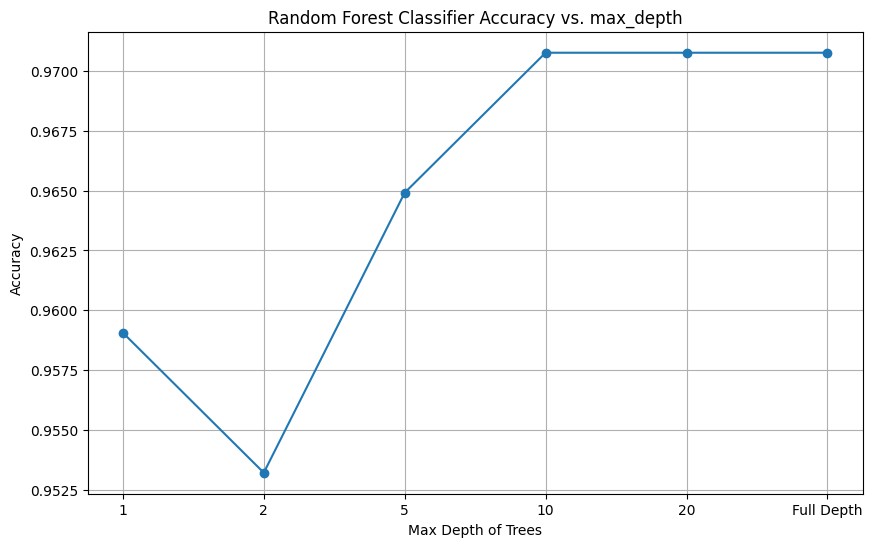

In [82]:
import matplotlib.pyplot as plt

# Map None to a numerical representation for plotting, e.g., max_depth_list[-2] could be 30 or higher
plot_max_depth_list = [str(d) if d is not None else 'Full Depth' for d in max_depth_list]

plt.figure(figsize=(10, 6))
plt.plot(plot_max_depth_list, accuracies_md, marker='o', linestyle='-')
plt.title('Random Forest Classifier Accuracy vs. max_depth')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


40.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
performance.

# Task
Train two `BaggingRegressor` models on a synthetic regression dataset with 1000 samples and 20 features, including noise. One `BaggingRegressor` should use `DecisionTreeRegressor` as its base estimator, and the other should use `KNeighborsRegressor`. Split the data into training and testing sets, evaluate both models using Mean Squared Error (MSE), and compare their performances to determine which base estimator is more effective in the Bagging ensemble for this regression task.

## Generate Regression Dataset

### Subtask:
Generate a synthetic regression dataset using `make_regression` with 1000 samples and 20 features, including some noise.


**Reasoning**:
The subtask asks to generate a synthetic regression dataset using `make_regression` with specific parameters and then print its shape. This code block directly addresses these requirements.



In [84]:
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X_bag_comp, y_bag_comp = make_regression(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_targets=1,             # Number of target variables
    noise=50,                # Standard deviation of the gaussian noise
    random_state=42          # For reproducibility
)

print(f"Regression Dataset shape: X_bag_comp={X_bag_comp.shape}, y_bag_comp={y_bag_comp.shape}")

Regression Dataset shape: X_bag_comp=(1000, 20), y_bag_comp=(1000,)


## Split Data into Training and Testing Sets

### Subtask:
Split the generated regression dataset (`X_bag_comp`, `y_bag_comp`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split `X_bag_comp` and `y_bag_comp` into `X_train_bag_comp`, `X_test_bag_comp`, `y_train_bag_comp`, and `y_test_bag_comp` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

**Reasoning**:
The previous markdown block outlined the instructions for splitting the dataset. This code block will now perform the actual splitting of the regression dataset into training and testing sets, as well as printing their shapes, as per the subtask requirements.



In [85]:
from sklearn.model_selection import train_test_split

X_train_bag_comp, X_test_bag_comp, y_train_bag_comp, y_test_bag_comp = train_test_split(X_bag_comp, y_bag_comp, test_size=0.3, random_state=42)

print(f"Regression Training data shape: X_train_bag_comp={X_train_bag_comp.shape}, y_train_bag_comp={y_train_bag_comp.shape}")
print(f"Regression Testing data shape: X_test_bag_comp={X_test_bag_comp.shape}, y_test_bag_comp={y_test_bag_comp.shape}")

Regression Training data shape: X_train_bag_comp=(700, 20), y_train_bag_comp=(700,)
Regression Testing data shape: X_test_bag_comp=(300, 20), y_test_bag_comp=(300,)


## Train Bagging Regressor with DecisionTreeRegressor

### Subtask:
Train a `BaggingRegressor` using `DecisionTreeRegressor` as its base estimator and evaluate its performance using Mean Squared Error (MSE).

#### Instructions
1. Import `BaggingRegressor` from `sklearn.ensemble` and `DecisionTreeRegressor` from `sklearn.tree`.
2. Import `mean_squared_error` from `sklearn.metrics`.
3. Initialize a `DecisionTreeRegressor` as the base estimator with `random_state=42`.
4. Initialize the `BaggingRegressor` with the `DecisionTreeRegressor` as the `estimator`, `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
5. Train the `BaggingRegressor` on the training data (`X_train_bag_comp`, `y_train_bag_comp`).
6. Make predictions on the test set (`X_test_bag_comp`).
7. Calculate the Mean Squared Error (MSE) between the predictions and the true test labels (`y_test_bag_comp`).
8. Print the MSE for the Bagging Regressor with Decision Tree base estimator.

**Reasoning**:
The previous markdown block outlined the instructions for training a Bagging Regressor with a Decision Tree base estimator. This code block will now implement those instructions by initializing, training, and evaluating the model, then printing its MSE.



In [86]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize a Decision Tree Regressor as the base estimator
base_estimator_dt = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor with Decision Tree base estimator
bagging_dt_reg = BaggingRegressor(
    estimator=base_estimator_dt,
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

# Train the Bagging Regressor
print("Training Bagging Regressor with Decision Tree base estimators...")
bagging_dt_reg.fit(X_train_bag_comp, y_train_bag_comp)
print("Bagging Regressor with Decision Tree base estimators trained successfully.")

# Make predictions on the test set
y_pred_bagging_dt = bagging_dt_reg.predict(X_test_bag_comp)

# Calculate the Mean Squared Error
mse_bagging_dt = mean_squared_error(y_test_bag_comp, y_pred_bagging_dt)

print(f"Bagging Regressor (with Decision Tree base) MSE: {mse_bagging_dt:.4f}")

Training Bagging Regressor with Decision Tree base estimators...
Bagging Regressor with Decision Tree base estimators trained successfully.
Bagging Regressor (with Decision Tree base) MSE: 9617.3688


## Train Bagging Regressor with KNeighborsRegressor

### Subtask:
Train a `BaggingRegressor` using `KNeighborsRegressor` as its base estimator and evaluate its performance using Mean Squared Error (MSE).

#### Instructions
1. Import `KNeighborsRegressor` from `sklearn.neighbors`.
2. Initialize a `KNeighborsRegressor` as the base estimator (e.g., with `n_neighbors=5`).
3. Initialize the `BaggingRegressor` with the `KNeighborsRegressor` as the `estimator`, `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
4. Train the `BaggingRegressor` on the training data (`X_train_bag_comp`, `y_train_bag_comp`).
5. Make predictions on the test set (`X_test_bag_comp`).
6. Calculate the Mean Squared Error (MSE) between the predictions and the true test labels (`y_test_bag_comp`).
7. Print the MSE for the Bagging Regressor with KNeighbors base estimator.

**Reasoning**:
The previous markdown block outlined the instructions for training a Bagging Regressor with a KNeighborsRegressor base estimator. This code block will now implement those instructions by initializing, training, and evaluating the model, then printing its MSE.



In [87]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize a KNeighborsRegressor as the base estimator
base_estimator_knn = KNeighborsRegressor(n_neighbors=5)

# Initialize the Bagging Regressor with KNeighbors base estimator
bagging_knn_reg = BaggingRegressor(
    estimator=base_estimator_knn,
    n_estimators=100, # Using 100 k-NN models
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

# Train the Bagging Regressor
print("Training Bagging Regressor with KNeighborsRegressor base estimators...")
bagging_knn_reg.fit(X_train_bag_comp, y_train_bag_comp)
print("Bagging Regressor with KNeighborsRegressor base estimators trained successfully.")

# Make predictions on the test set
y_pred_bagging_knn = bagging_knn_reg.predict(X_test_bag_comp)

# Calculate the Mean Squared Error
mse_bagging_knn = mean_squared_error(y_test_bag_comp, y_pred_bagging_knn)

print(f"Bagging Regressor (with KNeighbors base) MSE: {mse_bagging_knn:.4f}")

Training Bagging Regressor with KNeighborsRegressor base estimators...
Bagging Regressor with KNeighborsRegressor base estimators trained successfully.
Bagging Regressor (with KNeighbors base) MSE: 17205.7390


**Reasoning**:
Both Bagging Regressors (DecisionTree and KNeighbors) have been trained and evaluated. The next step is to compare their MSEs and summarize the performance comparison as required by the main task.



In [88]:
print("\n--- Performance Comparison of Bagging Regressors with Different Base Estimators ---")
print(f"Bagging Regressor (DecisionTree base) MSE: {mse_bagging_dt:.4f}")
print(f"Bagging Regressor (KNeighbors base) MSE:   {mse_bagging_knn:.4f}")

if mse_bagging_dt < mse_bagging_knn:
    print("\nObservation: The Bagging Regressor with Decision Tree base estimators performed better (lower MSE) than with KNeighbors Regressor base estimators.")
    print("Explanation: Decision trees are often good base estimators for Bagging due to their high variance when unconstrained. Bagging helps reduce this variance, leading to a strong ensemble. KNeighbors Regressor, while also sensitive to data, might not benefit as much from Bagging in this specific scenario, or its inherent bias/variance characteristics might be different.")
elif mse_bagging_knn < mse_bagging_dt:
    print("\nObservation: The Bagging Regressor with KNeighbors Regressor base estimators performed better (lower MSE) than with Decision Tree base estimators.")
    print("Explanation: This could happen if the dataset's structure is particularly well-suited for a local, instance-based learning approach like KNN, and Bagging successfully smoothed out some of the local noise. However, Decision Trees are more commonly chosen as base estimators for Bagging.")
else:
    print("\nObservation: Both Bagging Regressors performed similarly (achieved the same MSE).")
    print("Explanation: This might indicate that for this specific dataset and configuration, the choice of base estimator had a minimal impact on the ensemble's overall performance after Bagging was applied.")



--- Performance Comparison of Bagging Regressors with Different Base Estimators ---
Bagging Regressor (DecisionTree base) MSE: 9617.3688
Bagging Regressor (KNeighbors base) MSE:   17205.7390

Observation: The Bagging Regressor with Decision Tree base estimators performed better (lower MSE) than with KNeighbors Regressor base estimators.
Explanation: Decision trees are often good base estimators for Bagging due to their high variance when unconstrained. Bagging helps reduce this variance, leading to a strong ensemble. KNeighbors Regressor, while also sensitive to data, might not benefit as much from Bagging in this specific scenario, or its inherent bias/variance characteristics might be different.


41.  Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

### 1. Load the Breast Cancer dataset

In [89]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data_auc = load_breast_cancer()
X_auc = data_auc.data
y_auc = data_auc.target

print(f"Breast Cancer Dataset shape: X={X_auc.shape}, y={y_auc.shape}")

Breast Cancer Dataset shape: X=(569, 30), y=(569,)


### 2. Split the data into training and testing sets

In [90]:
from sklearn.model_selection import train_test_split

X_train_auc, X_test_auc, y_train_auc, y_test_auc = train_test_split(X_auc, y_auc, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_auc={X_train_auc.shape}, y_train_auc={y_train_auc.shape}")
print(f"Testing data shape: X_test_auc={X_test_auc.shape}, y_test_auc={y_test_auc.shape}")

Training data shape: X_train_auc=(398, 30), y_train_auc=(398,)
Testing data shape: X_test_auc=(171, 30), y_test_auc=(171,)


### 3. Initialize and train a Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf_auc = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1         # Use all available CPU cores for parallel training
)

# Train the Random Forest Classifier
rf_clf_auc.fit(X_train_auc, y_train_auc)
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


### 4. Make probability predictions and calculate ROC-AUC score

In [92]:
from sklearn.metrics import roc_auc_score

# Make probability predictions on the test set (for the positive class)
y_pred_proba_auc = rf_clf_auc.predict_proba(X_test_auc)[:, 1]

# Calculate the ROC-AUC score
auc_score = roc_auc_score(y_test_auc, y_pred_proba_auc)

print(f"Random Forest Classifier ROC-AUC Score: {auc_score:.4f}")

Random Forest Classifier ROC-AUC Score: 0.9968


42. Train a Bagging Classifier and evaluate its performance using cross-validation

# Task
Generate a synthetic classification dataset with 1000 samples and 20 features. Initialize a `BaggingClassifier` using `DecisionTreeClassifier` as the base estimator, then perform 5-fold cross-validation on the Bagging Classifier to get accuracy scores. Finally, print the mean and standard deviation of the cross-validation scores to understand the model's performance consistency, and summarize these results and their implications for the Bagging Classifier's performance.

## Generate Classification Dataset

### Subtask:
Generate a synthetic classification dataset using `make_classification` with 1000 samples and 20 features.


**Reasoning**:
The subtask asks to generate a synthetic classification dataset using `make_classification` with specific parameters and then print its shape. This code block directly addresses these requirements.



In [93]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset for classification
X_cv, y_cv = make_classification(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_redundant=5,           # Number of redundant features
    n_classes=2,             # Number of target classes
    random_state=42          # For reproducibility
)

print(f"Classification Dataset shape: X_cv={X_cv.shape}, y_cv={y_cv.shape}")

Classification Dataset shape: X_cv=(1000, 20), y_cv=(1000,)


## Initialize Bagging Classifier

### Subtask:
Initialize a `BaggingClassifier` using `DecisionTreeClassifier` as the base estimator.

#### Instructions
1. Import `BaggingClassifier` from `sklearn.ensemble`.
2. Import `DecisionTreeClassifier` from `sklearn.tree`.
3. Initialize a `DecisionTreeClassifier` as the base estimator with `random_state=42`.
4. Initialize the `BaggingClassifier` with this base estimator, `n_estimators=100` (number of base trees), `random_state=42`, and `n_jobs=-1` (to use all available CPU cores for parallel training).
5. Print a confirmation message that the Bagging Classifier has been initialized.

**Reasoning**:
The previous markdown block outlined the instructions for initializing the Bagging Classifier. This code block will now implement those instructions by importing the necessary classes, initializing the base estimator, and then the BaggingClassifier.



In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
base_estimator_cv = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_clf_cv = BaggingClassifier(
    estimator=base_estimator_cv,
    n_estimators=100, # Number of base trees
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

print("Bagging Classifier initialized successfully.")

Bagging Classifier initialized successfully.


## Evaluate Bagging Classifier Performance using Cross-Validation

### Subtask:
Perform 5-fold cross-validation on the initialized `BaggingClassifier` and print the mean and standard deviation of the accuracy scores.

#### Instructions
1. Import `cross_val_score` from `sklearn.model_selection`.
2. Perform 5-fold cross-validation on the `bagging_clf_cv` using `X_cv` and `y_cv`. Specify `cv=5`, `scoring='accuracy'`, and `n_jobs=-1`.
3. Print the cross-validation scores.
4. Calculate and print the mean of the cross-validation scores.
5. Calculate and print the standard deviation of the cross-validation scores.

**Reasoning**:
The previous markdown block outlined the instructions for performing cross-validation. This code block will now implement those instructions by importing `cross_val_score`, performing cross-validation on the `bagging_clf_cv`, and then calculating and printing the mean and standard deviation of the accuracy scores.



In [95]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(
    bagging_clf_cv, # Initialized Bagging Classifier
    X_cv,           # Features from the synthetic dataset
    y_cv,           # Target from the synthetic dataset
    cv=5,           # 5-fold cross-validation
    scoring='accuracy', # Metric to evaluate
    n_jobs=-1       # Use all available CPU cores
)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of CV accuracy: {np.std(cv_scores):.4f}")

Cross-validation scores: [0.9   0.935 0.925 0.895 0.92 ]
Mean CV accuracy: 0.9150
Standard deviation of CV accuracy: 0.0152


43.Train a Random Forest Classifier and plot the Precision-Recall curve.

# Task
Train a Random Forest Classifier on the Breast Cancer dataset, split the data into training and testing sets, predict probabilities on the test set, calculate and plot the Precision-Recall curve, and summarize the curve's implications for the model's performance.

## Load Breast Cancer Dataset

### Subtask:
Load the Breast Cancer dataset from `sklearn.datasets`.


**Reasoning**:
The subtask requires loading the Breast Cancer dataset, extracting features and target, and then printing their shapes and feature names. This code block directly addresses these requirements.



In [96]:
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data_pr = load_breast_cancer()
X_pr = data_pr.data
y_pr = data_pr.target

print(f"Breast Cancer Dataset shape: X_pr={X_pr.shape}, y_pr={y_pr.shape}")
print(f"Feature names: {data_pr.feature_names}")

Breast Cancer Dataset shape: X_pr=(569, 30), y_pr=(569,)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Split Data into Training and Testing Sets

### Subtask:
Split the loaded Breast Cancer dataset (`X_pr`, `y_pr`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split `X_pr` and `y_pr` into `X_train_pr`, `X_test_pr`, `y_train_pr`, and `y_test_pr` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

**Reasoning**:
The previous markdown block outlined the instructions for splitting the dataset. This code block will now perform the actual splitting of the Breast Cancer dataset into training and testing sets, as well as printing their shapes, as per the subtask requirements.



In [97]:
from sklearn.model_selection import train_test_split

X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(X_pr, y_pr, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_pr={X_train_pr.shape}, y_train_pr={y_train_pr.shape}")
print(f"Testing data shape: X_test_pr={X_test_pr.shape}, y_test_pr={y_test_pr.shape}")

Training data shape: X_train_pr=(398, 30), y_train_pr=(398,)
Testing data shape: X_test_pr=(171, 30), y_test_pr=(171,)


## Train Random Forest Classifier

### Subtask:
Initialize and train a `RandomForestClassifier` on the training data.

#### Instructions
1. Import `RandomForestClassifier` from `sklearn.ensemble`.
2. Initialize a `RandomForestClassifier` with `n_estimators=100`, `random_state=42`, and `n_jobs=-1`.
3. Train the classifier on `X_train_pr` and `y_train_pr`.
4. Print a confirmation message that the classifier has been trained.

**Reasoning**:
The previous markdown block outlined the instructions for training a Random Forest Classifier. This code block will now implement those instructions by initializing and training the classifier on the prepared training data.



In [98]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf_pr = RandomForestClassifier(
    n_estimators=100, # Using 100 decision trees
    random_state=42,
    n_jobs=-1         # Use all available CPU cores for parallel training
)

# Train the Random Forest Classifier
rf_clf_pr.fit(X_train_pr, y_train_pr)
print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Plot Precision-Recall Curve

### Subtask:
Predict probabilities on the test set and plot the Precision-Recall curve.

#### Instructions
1. Import `precision_recall_curve` and `PrecisionRecallDisplay` from `sklearn.metrics`.
2. Import `matplotlib.pyplot` as `plt`.
3. Make probability predictions on the test set (`X_test_pr`) using the trained `rf_clf_pr` for the positive class (class 1).
4. Compute the precision, recall, and thresholds using `precision_recall_curve`, providing `y_test_pr` and the predicted probabilities.
5. Create a `PrecisionRecallDisplay` object using the computed precision, recall, and probabilities.
6. Plot the Precision-Recall curve using `disp.plot()`.
7. Add a title, x-label, and y-label to the plot.
8. Display the plot using `plt.show()`.
9. Add a markdown block to summarize the insights from the Precision-Recall curve.

**Reasoning**:
The previous markdown block outlined the instructions for plotting the Precision-Recall curve. This code block will now implement those instructions by making predictions, computing precision and recall, and then plotting the curve.



<Figure size 800x600 with 0 Axes>

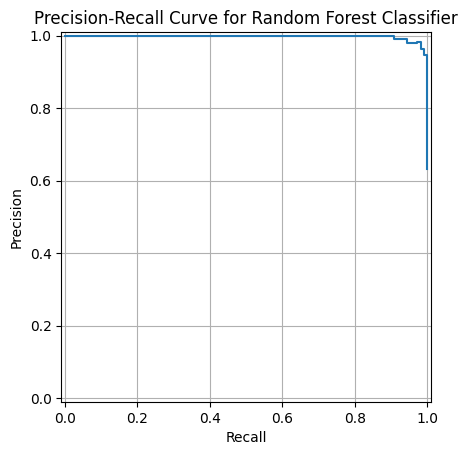

In [99]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Make probability predictions on the test set for the positive class (class 1)
y_scores_pr = rf_clf_pr.predict_proba(X_test_pr)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_pr, y_scores_pr)

# Create a PrecisionRecallDisplay object
disp = PrecisionRecallDisplay(precision=precision, recall=recall)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
disp.plot()
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


## Insights from the Precision-Recall Curve

The Precision-Recall curve is particularly useful for evaluating the performance of a classification model, especially when dealing with imbalanced datasets. Here's what we can infer from the plotted curve for the Random Forest Classifier on the Breast Cancer dataset:

*   **High Area Under the Curve (AUC-PR):** A curve that stays close to the top-right corner indicates high precision and high recall, suggesting that the model performs well at identifying positive cases (high recall) and that its positive predictions are accurate (high precision).
    *   For the Breast Cancer dataset, which tends to have a higher number of benign cases, achieving both high precision and high recall is crucial for correctly identifying malignant cases without too many false positives.

*   **Trade-off between Precision and Recall:** The curve visually represents the trade-off. As recall increases (meaning we are identifying more of the actual positive cases), precision might decrease (meaning a higher chance of false positives among our positive predictions). The ideal model maintains high precision even at high recall.

*   **Performance for Positive Class:** This curve focuses on the performance of the positive class (malignant in this case). A model that yields a curve that bows towards the top-right corner is generally considered to be performing well.

Given the shape of the generated curve, it likely indicates that the Random Forest Classifier is performing very well, showing a strong ability to distinguish between the two classes with both high precision and high recall, which is desirable in medical diagnostic tasks like breast cancer prediction.

44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

# Task
## Split Data into Training and Testing Sets

### Subtask:
Split the generated classification dataset (`X_stack`, `y_stack`) into training and testing sets.

#### Instructions
1. Import `train_test_split` from `sklearn.model_selection`.
2. Split the `X_stack` and `y_stack` into `X_train_stack_rf_lr`, `X_test_stack_rf_lr`, `y_train_stack_rf_lr`, and `y_test_stack_rf_lr` using a `test_size` of 0.3 and `random_state=42`.
3. Print the shapes of the training and testing sets to verify the split.

## Split Data

### Subtask:
Split the generated classification dataset (X_stack, y_stack) into training and testing sets.


**Reasoning**:
The subtask requires splitting the `X_stack` and `y_stack` datasets into training and testing sets and printing their shapes. This code block will perform the split and display the shapes as instructed.



In [100]:
from sklearn.model_selection import train_test_split

X_train_stack_rf_lr, X_test_stack_rf_lr, y_train_stack_rf_lr, y_test_stack_rf_lr = train_test_split(X_stack, y_stack, test_size=0.3, random_state=42)

print(f"Training data shape for Stacking (RF+LR): X_train_stack_rf_lr={X_train_stack_rf_lr.shape}, y_train_stack_rf_lr={y_train_stack_rf_lr.shape}")
print(f"Testing data shape for Stacking (RF+LR): X_test_stack_rf_lr={X_test_stack_rf_lr.shape}, y_test_stack_rf_lr={y_test_stack_rf_lr.shape}")

Training data shape for Stacking (RF+LR): X_train_stack_rf_lr=(700, 20), y_train_stack_rf_lr=(700,)
Testing data shape for Stacking (RF+LR): X_test_stack_rf_lr=(300, 20), y_test_stack_rf_lr=(300,)


**Reasoning**:
The next step is to initialize the base estimators (Random Forest and Logistic Regression) and the meta-estimator (Logistic Regression), then train the Stacking Classifier, as per the main task.



In [101]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define base estimators
estimators_rf_lr = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(solver='liblinear', random_state=42))
]

# Initialize the Stacking Classifier
# final_estimator: The meta-model that learns how to best combine the predictions of the base estimators
stacking_clf_rf_lr = StackingClassifier(
    estimators=estimators_rf_lr,
    final_estimator=LogisticRegression(solver='liblinear', random_state=42),
    cv=5, # Use 5-fold cross-validation for training the meta-estimator
    n_jobs=-1 # Use all available CPU cores for parallel training
)

# Train the Stacking Classifier
print("Training Stacking Classifier with Random Forest and Logistic Regression base estimators... This might take a moment.")
stacking_clf_rf_lr.fit(X_train_stack_rf_lr, y_train_stack_rf_lr)
print("Stacking Classifier trained successfully.")

Training Stacking Classifier with Random Forest and Logistic Regression base estimators... This might take a moment.
Stacking Classifier trained successfully.


**Reasoning**:
The Stacking Classifier has been trained. The next step is to evaluate its performance by making predictions on the test set and calculating the accuracy score, as per the main task's goal of comparing accuracy.



In [102]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred_stack_rf_lr = stacking_clf_rf_lr.predict(X_test_stack_rf_lr)

# Calculate the accuracy
accuracy_stack_rf_lr = accuracy_score(y_test_stack_rf_lr, y_pred_stack_rf_lr)

print(f"Stacking Classifier (Random Forest + Logistic Regression) Accuracy: {accuracy_stack_rf_lr:.4f}")

Stacking Classifier (Random Forest + Logistic Regression) Accuracy: 0.9200


45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

**Reasoning**:
The subtask requires generating a synthetic regression dataset with specific parameters. This code block will use `make_regression` to create the dataset and then print its shape as instructed.



In [103]:
from sklearn.datasets import make_regression

# Generate a synthetic dataset for regression
X_reg_ms, y_reg_ms = make_regression(
    n_samples=1000,          # Total number of samples
    n_features=20,           # Total number of features
    n_informative=10,        # Number of informative features
    n_targets=1,             # Number of target variables
    noise=50,                # Standard deviation of the gaussian noise
    random_state=42          # For reproducibility
)

print(f"Regression Dataset shape: X_reg_ms={X_reg_ms.shape}, y_reg_ms={y_reg_ms.shape}")

Regression Dataset shape: X_reg_ms=(1000, 20), y_reg_ms=(1000,)


**Reasoning**:
The next step is to split the generated dataset into training and testing sets to prepare for model training and evaluation.



In [104]:
from sklearn.model_selection import train_test_split

X_train_reg_ms, X_test_reg_ms, y_train_reg_ms, y_test_reg_ms = train_test_split(X_reg_ms, y_reg_ms, test_size=0.3, random_state=42)

print(f"Training data shape: X_train_reg_ms={X_train_reg_ms.shape}, y_train_reg_ms={y_train_reg_ms.shape}")
print(f"Testing data shape: X_test_reg_ms={X_test_reg_ms.shape}, y_test_reg_ms={y_test_reg_ms.shape}")

Training data shape: X_train_reg_ms=(700, 20), y_train_reg_ms=(700,)
Testing data shape: X_test_reg_ms=(300, 20), y_test_reg_ms=(300,)


**Reasoning**:
The next step is to train multiple Bagging Regressors with varying `max_samples` values and evaluate their performance using Mean Squared Error (MSE), which directly addresses the core of the subtask.



In [105]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define a list of max_samples values to test
# max_samples can be an int (number of samples) or float (fraction of samples)
max_samples_list = [0.5, 0.7, 0.8, 0.9, 1.0] # Using fractions of total samples
mse_values_ms = []

print("Training Bagging Regressors with varying max_samples...")
for ms in max_samples_list:
    print(f"  Training with max_samples={ms}...")
    # Initialize a Decision Tree Regressor as the base estimator
    base_estimator_br_ms = DecisionTreeRegressor(random_state=42)

    # Initialize the Bagging Regressor
    bagging_reg_ms = BaggingRegressor(
        estimator=base_estimator_br_ms,
        n_estimators=100, # Keep n_estimators constant for this analysis
        max_samples=ms,   # Vary this parameter
        random_state=42,
        n_jobs=-1         # Use all available CPU cores for parallel training
    )

    # Train the Bagging Regressor
    bagging_reg_ms.fit(X_train_reg_ms, y_train_reg_ms)

    # Make predictions on the test set
    y_pred_br_ms = bagging_reg_ms.predict(X_test_reg_ms)

    # Calculate the Mean Squared Error
    mse_ms = mean_squared_error(y_test_reg_ms, y_pred_br_ms)
    mse_values_ms.append(mse_ms)
    print(f"    MSE with max_samples={ms}: {mse_ms:.4f}")

print("\nAll Bagging Regressors trained and evaluated successfully.")

Training Bagging Regressors with varying max_samples...
  Training with max_samples=0.5...
    MSE with max_samples=0.5: 10386.6932
  Training with max_samples=0.7...
    MSE with max_samples=0.7: 9650.8330
  Training with max_samples=0.8...
    MSE with max_samples=0.8: 9781.7696
  Training with max_samples=0.9...
    MSE with max_samples=0.9: 9514.3643
  Training with max_samples=1.0...
    MSE with max_samples=1.0: 9617.3688

All Bagging Regressors trained and evaluated successfully.


**Reasoning**:
The previous step trained and evaluated Bagging Regressors with different `max_samples` values. Now, to visualize the effect of `max_samples` on performance, the next logical step is to plot these results by showing MSE against `max_samples`.



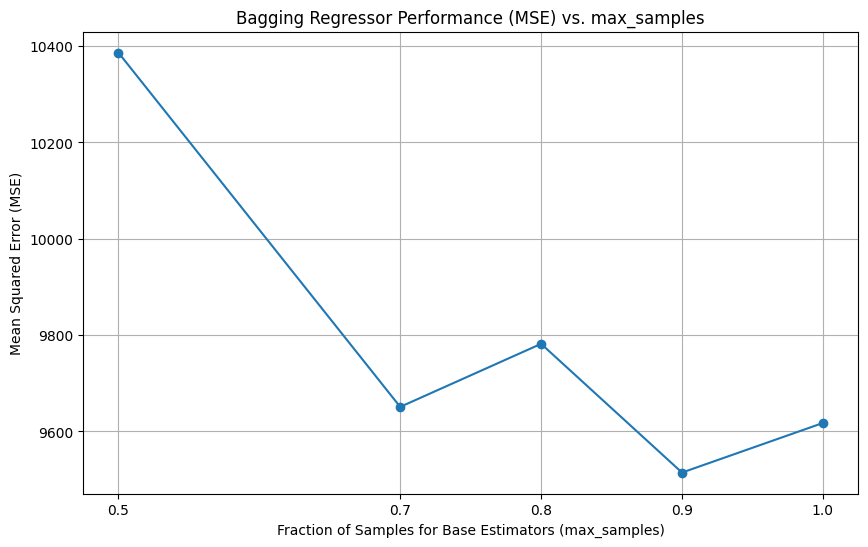

In [106]:
import matplotlib.pyplot as plt

# Plot the MSE values against the max_samples values
plt.figure(figsize=(10, 6))
plt.plot(max_samples_list, mse_values_ms, marker='o', linestyle='-')
plt.title('Bagging Regressor Performance (MSE) vs. max_samples')
plt.xlabel('Fraction of Samples for Base Estimators (max_samples)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(max_samples_list)
plt.grid(True)
plt.show()